<a href="https://colab.research.google.com/github/ShrutiJain456/Flight-Delay-ML/blob/main/Flight_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHAT WILL BE COVERED

read more about ML here: https://thecognitiveink.medium.com/demystifying-machine-learning-your-path-to-becoming-an-ml-engineer-759b61b78c30

WHAT WE WILL BE COVERING TODAY:

- Data pre-processing -
	- basic stats - np, describe, info -done
	- apply function, lambda
	- column names, delimiter -
	- fillna, dropna - fillna example
	- imbalanced datasets --example
	- label encoding -- generally used b4 applying ML model
	- converting to categorical type -- saves storage
	- changing data types -- ??
	- binning -- take a new dataset
	- identifying / removing outliers -- zscore -- ??
	- Date time conversion -- done
	- Regex  --

we need a small dataset jisme, column names, delimiter, fillna,
- Vis - Matplotlib, Seaborn
	- matplotlib only
	- bar, line, pie, heatmap, boxplot, scatter, histogram
  
- Model -
	- sklearn
	- classification
		-
	- metrics --acc, confusionmatrix, precision, recalls --
- Deployment -
	- Gradio -- basics(local deployment)


# Different Types of Datasets

Methods to import different types of Data: https://thecognitiveink.medium.com/bits-bytes-of-data-a-machine-learning-odyssey-90c7e0ed25ed

## Structured Data:-


---



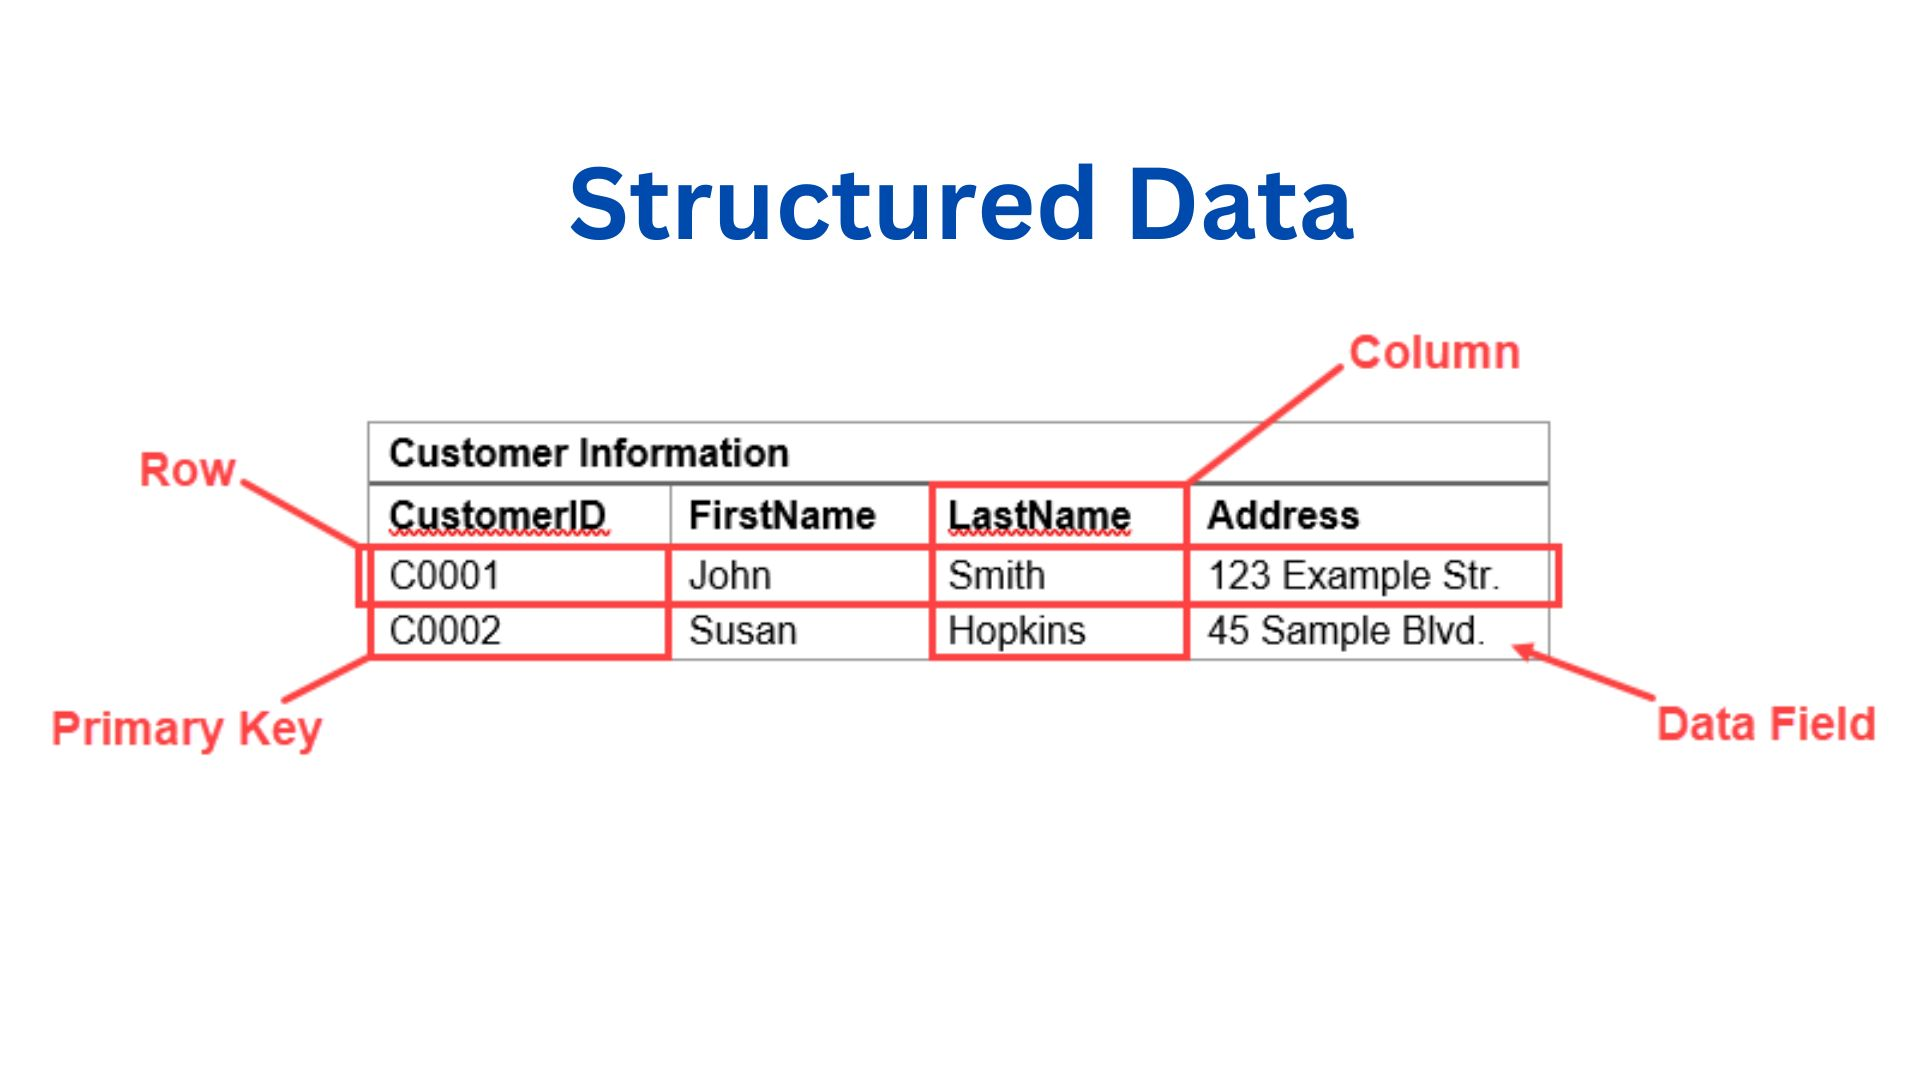

### **CSV Files:**


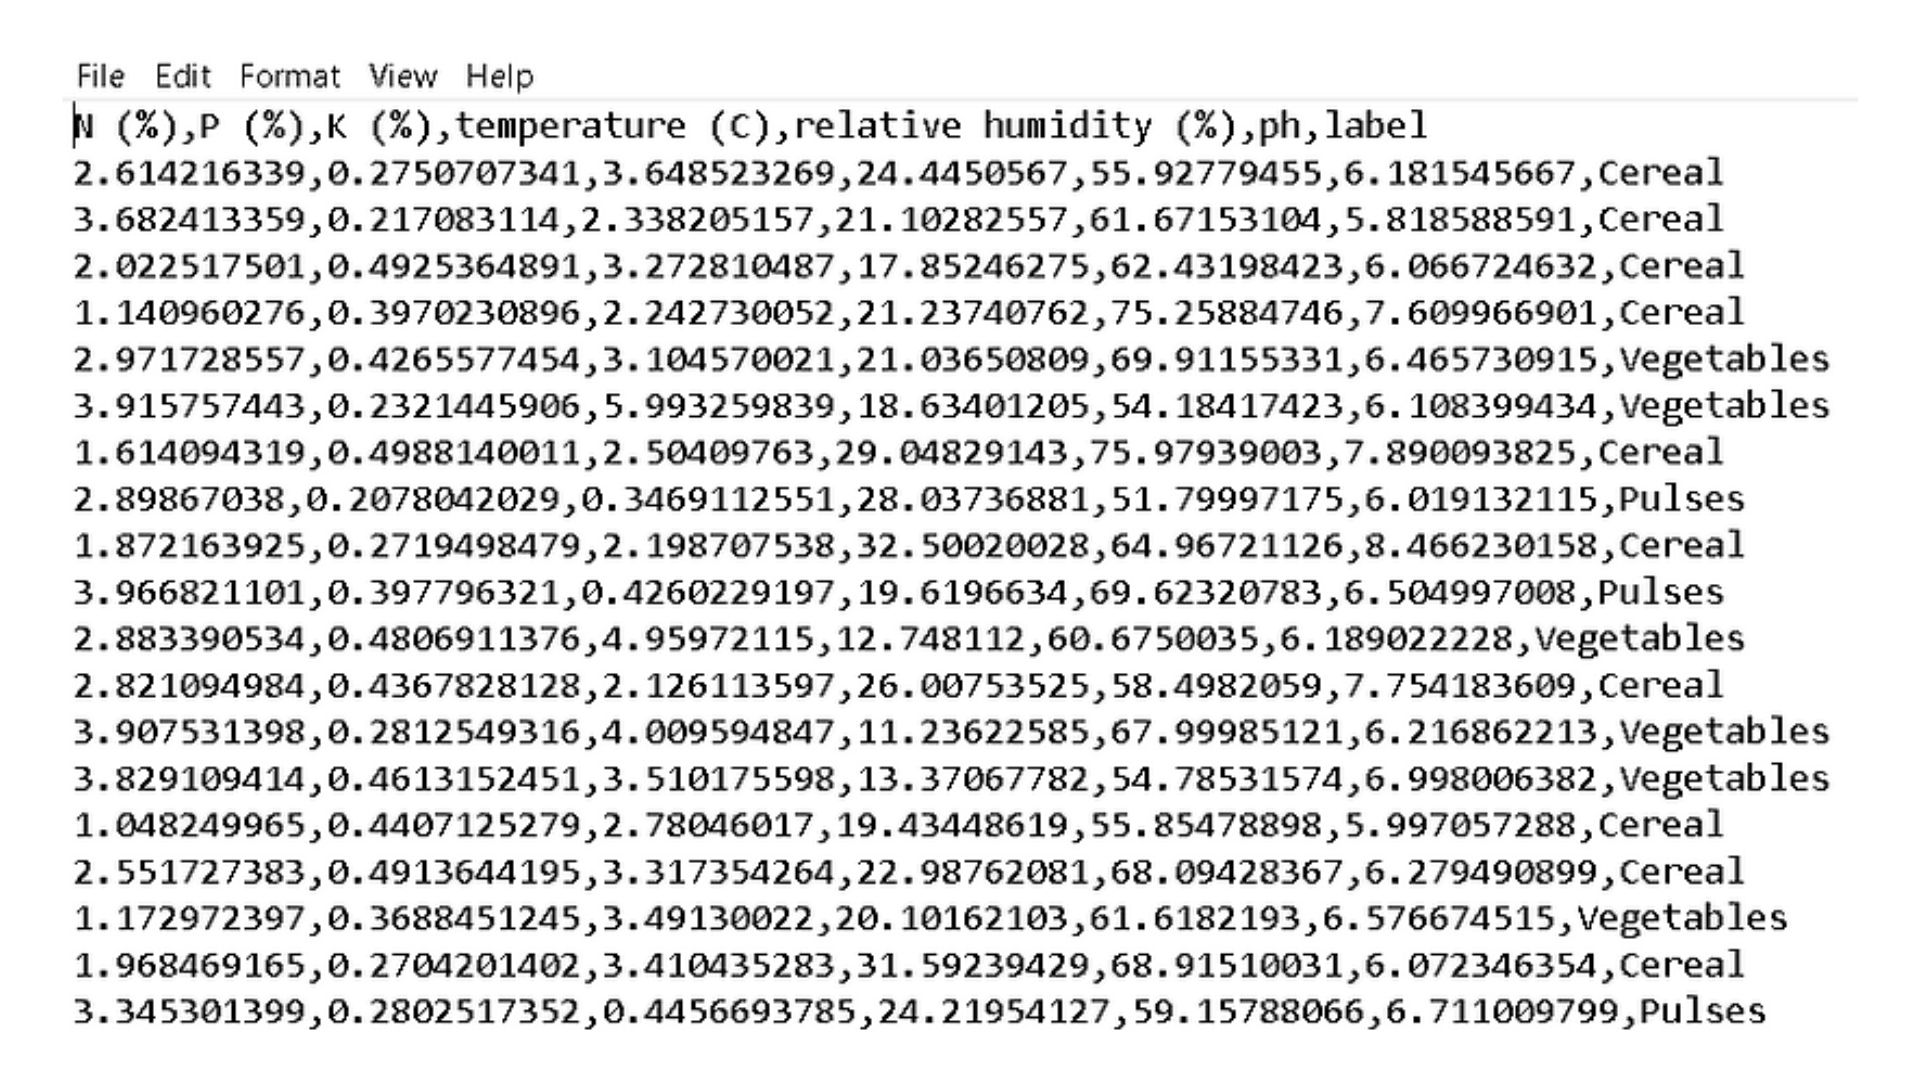

### **Excel Files:**


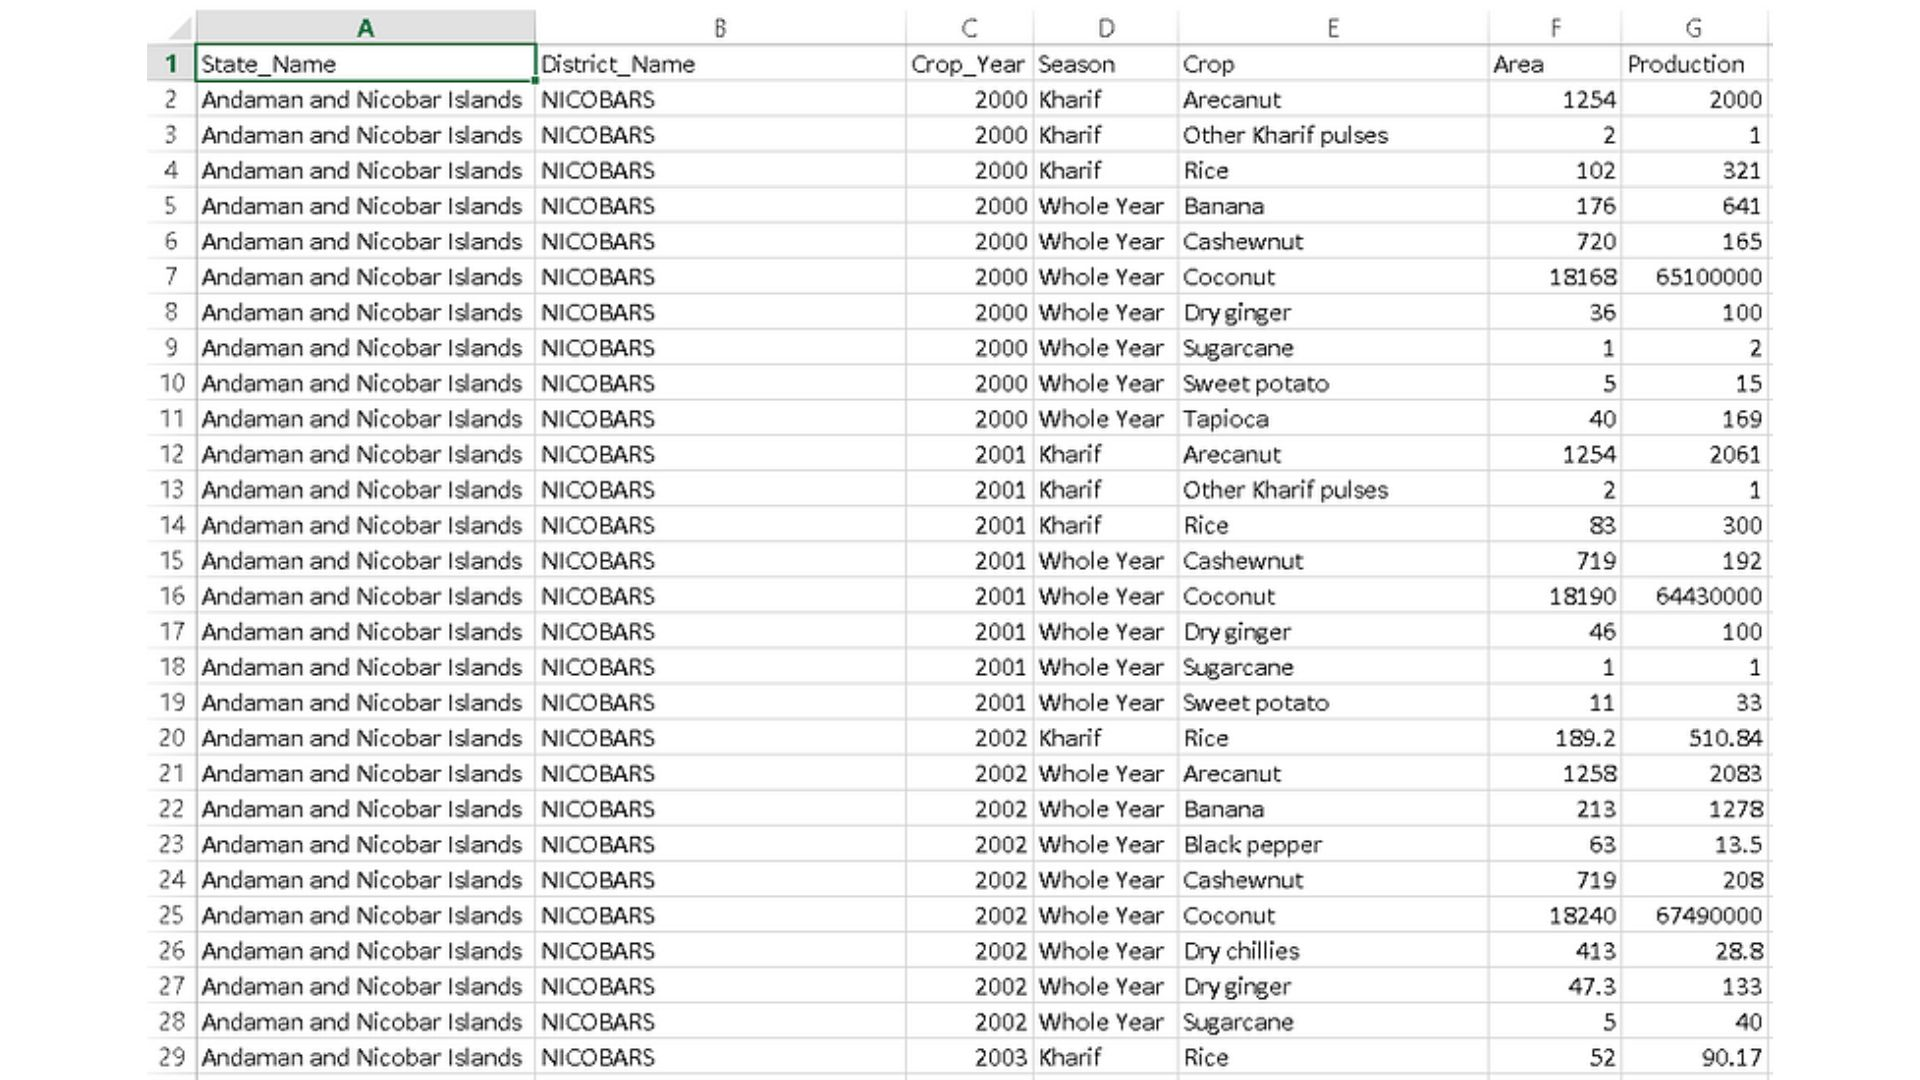

## Semi-Structured Data:-


---



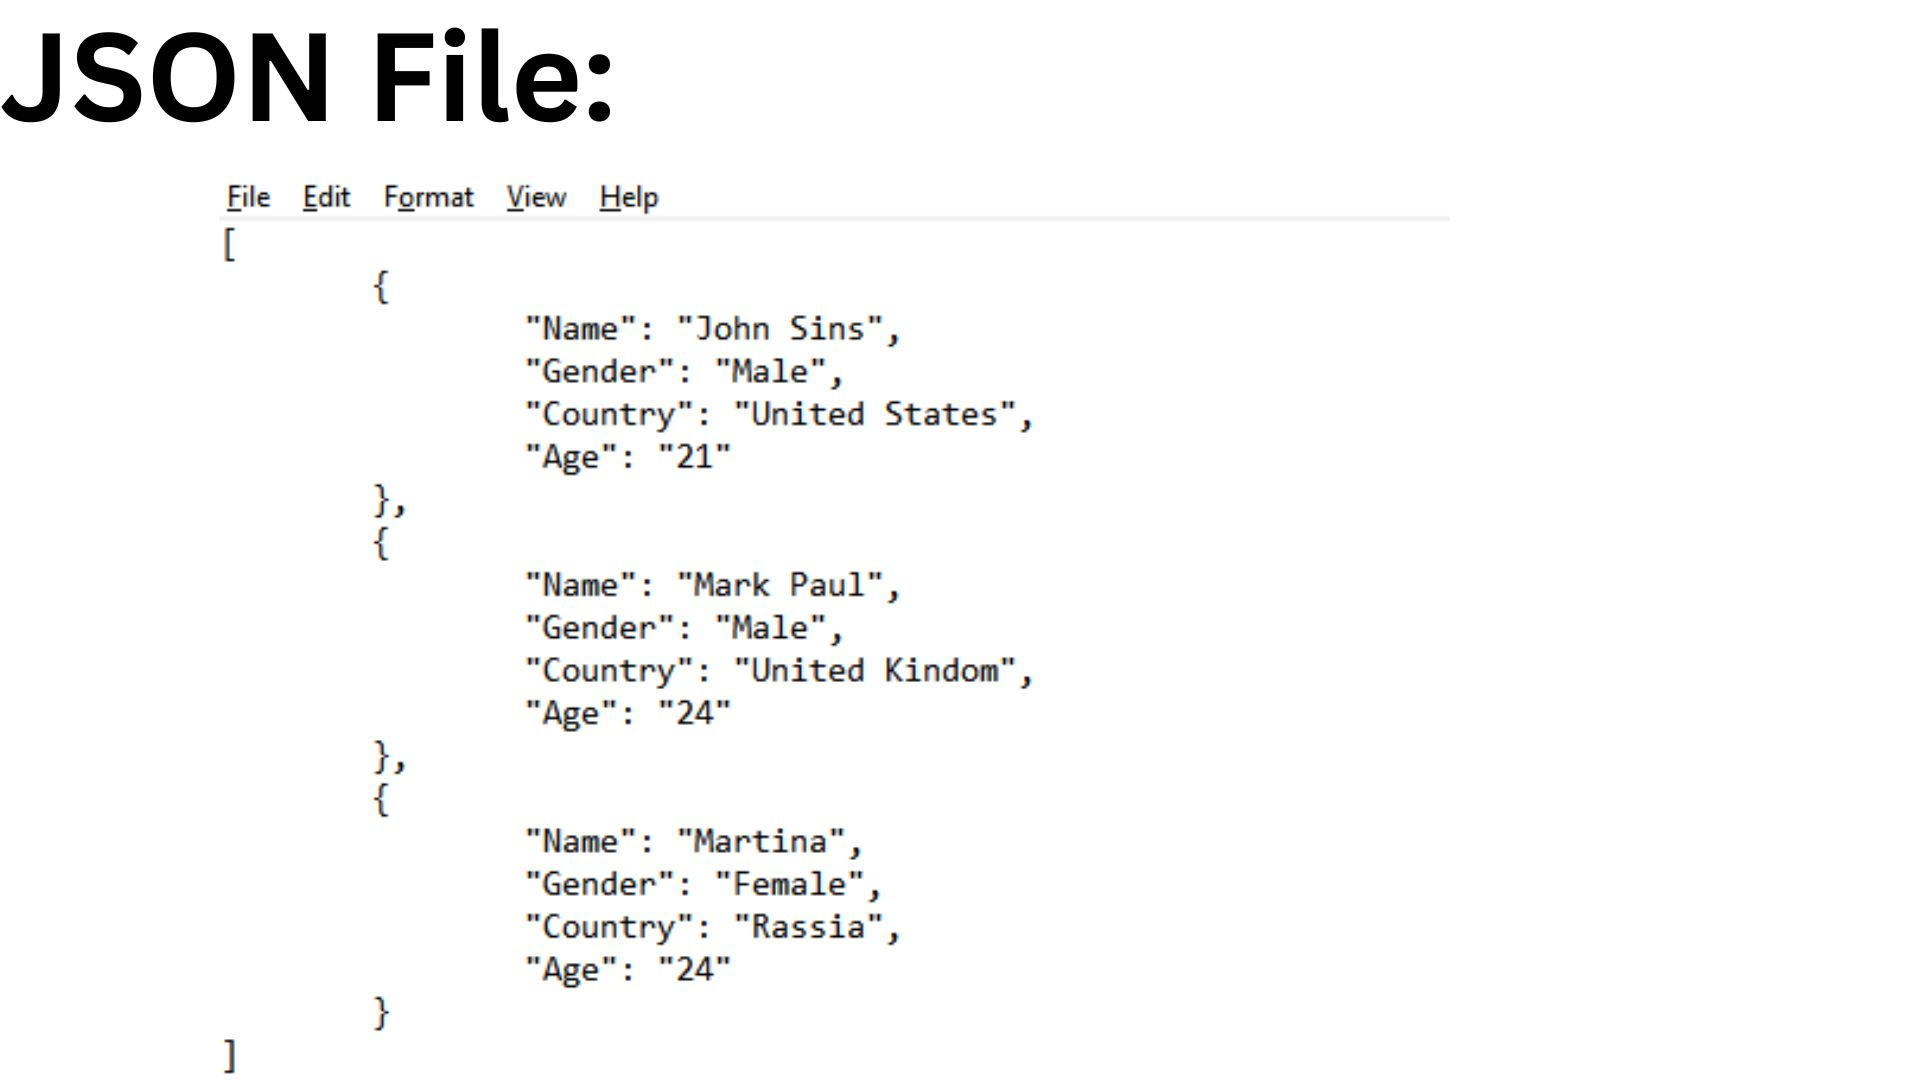

## Unstructured Data:-


---



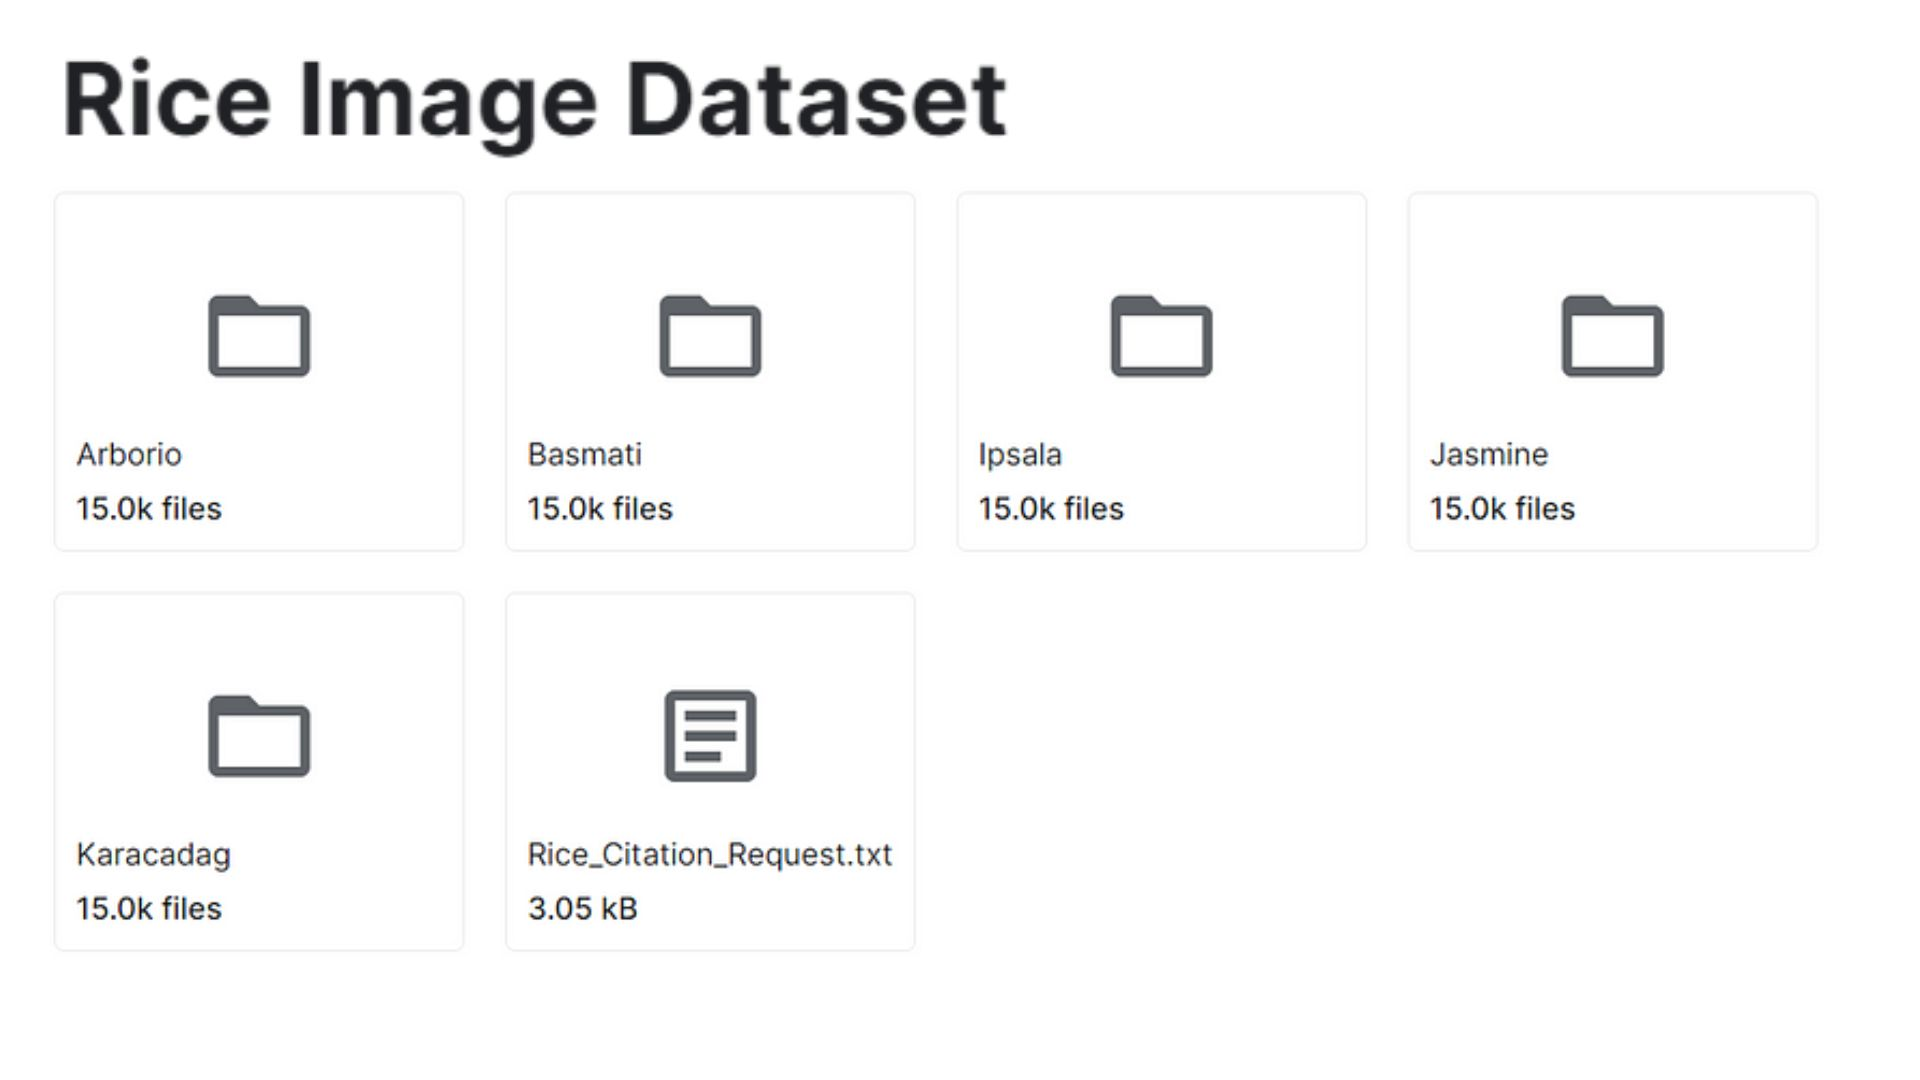

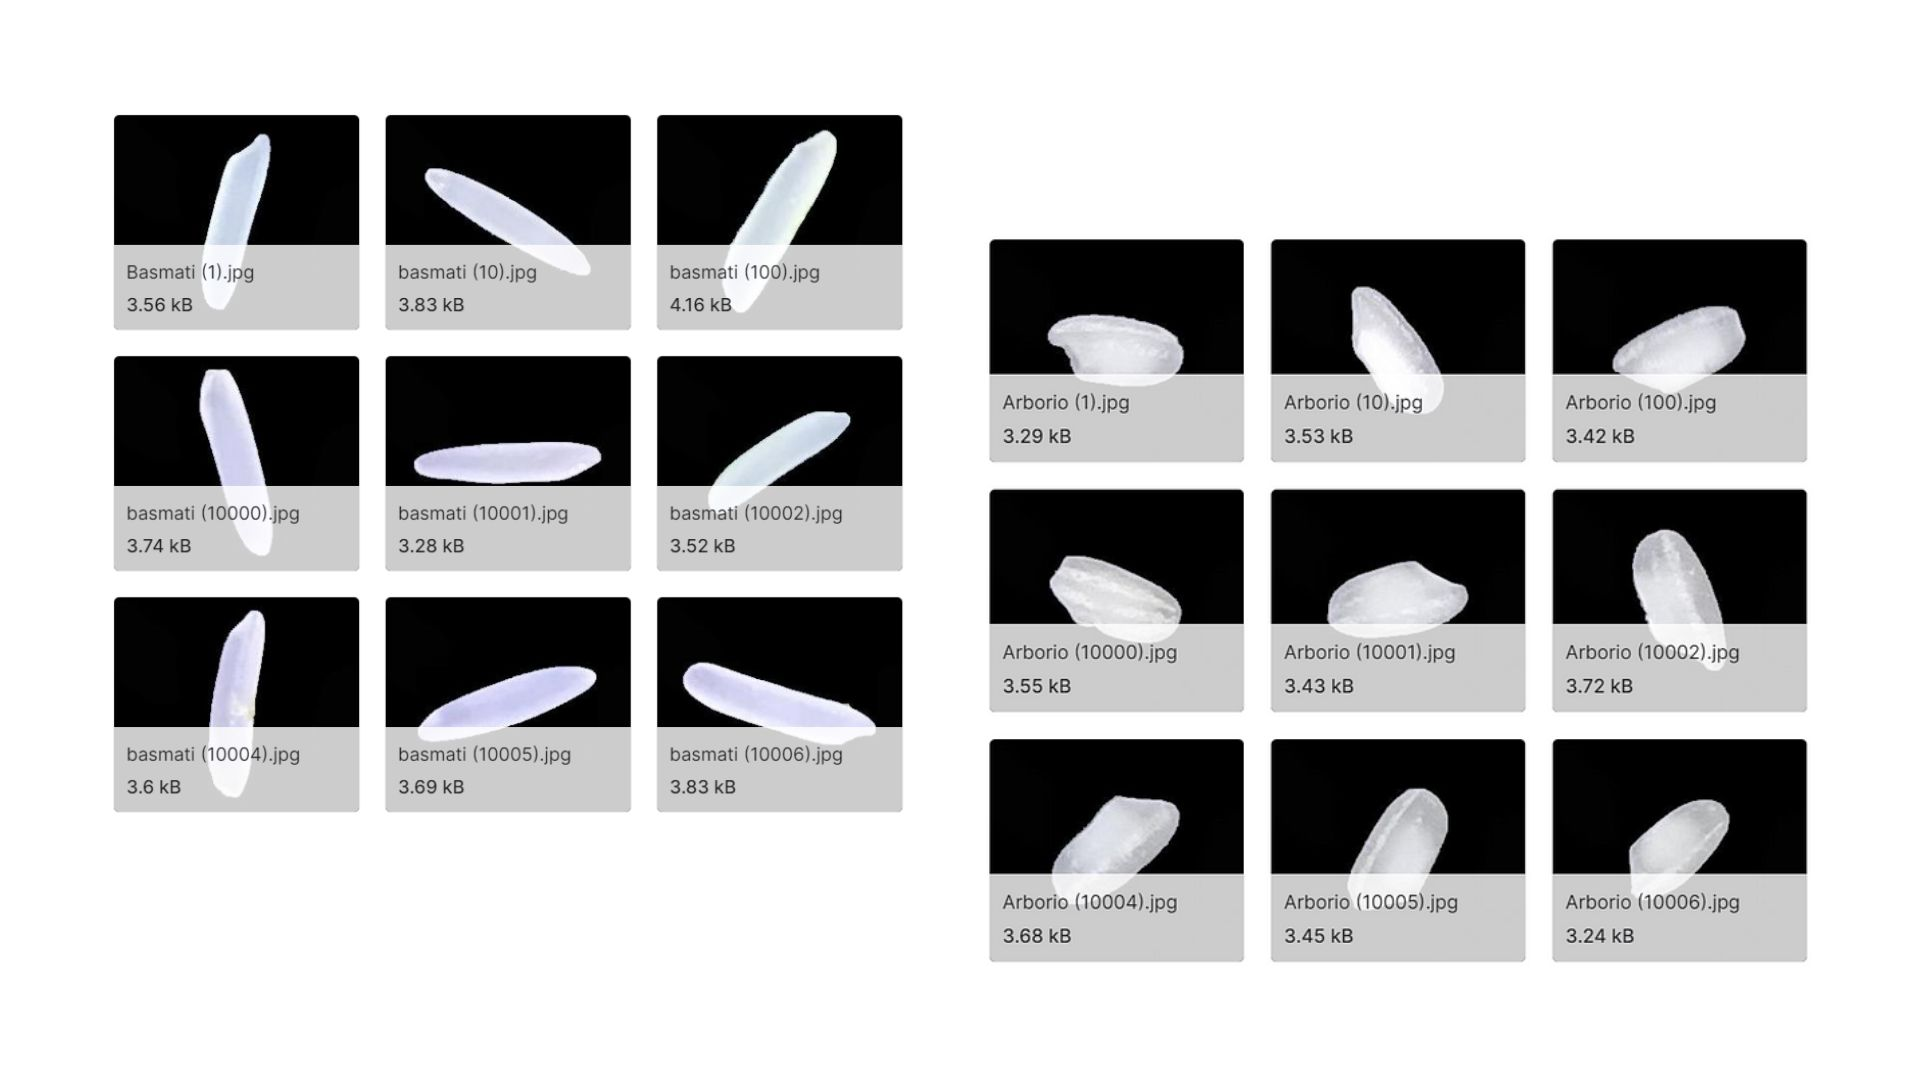

# IMPORTING BASIC LIBRARIES

We will import the usual libraries that we need for data preprocessing and visualzation initally, some common libraries include Pandas Numpy for preproceessing and Matplotlib and Seaborn for Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#pd.set_option("display.max_columns", 500)  #practically show this by commenting and uncommenting this line of code
#plt.style.use("seaborn-colorblind")        #nope
#pal = sns.color_palette()                  #nope

<ipython-input-12-e87cedd58340>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")        #nope


# Importing a large dataset from google drive

In [ ]:
from google.colab import drive      #standard for importing file from a drive link
drive.mount('/content/drive')

In [ ]:
link = 'https://drive.google.com/uc?id=1StfOm_hCyVhyrvRhUCH5npVDY63hg766'
df = pd.read_csv(link)
#df = pd.read_excel()
#df = pd.read_table()

NameError: ignored

# Grouping of Delays

Per Wikipedia https://en.wikipedia.org/wiki/Flight_cancellation_and_delay:

- Delays are divided into three categories, namely "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" ( 45 minutes delay).

# DATA CARD:




---

1.	**FlightDate**: Date of the flight  
2.	**Airline**: Name of the Airline
3.	**Flight_Number_Marketing_Airline**: Flight Number
4.	**Origin**: Origin Code
5.	**Dest**: Destination Code
6.	**Cancelled**: If Flight Cancelled or not
7.	**Diverted**: If Flight Diverted or not
8.	**CRSDepTime**: CRS Elapsed Time of Flight, in Minutes
9.	**DepTime**: Actual Departure Time (local time: hhmm)
10.	**DepDelayMinutes**: Difference in minutes between scheduled and actual departure time
11.	**OriginAirportID**: Origin Airport, Airport ID. An identification number assigned by US
DOT to identify a unique airport. Use this field for airport analysis across a range of years
because an airport can change its airport code and airport codes can be reused
12.	**OriginCityName**: Origin Airport, City Name
13.	**OriginStateName**: Origin Airport, State Code
14.	**DestAirportID**: Destination Airport, Airport ID. An identification number assigned by US
DOT to identify a unique airport. Use this field for airport analysis across a range of years
because an airport can change its airport code and airport codes can be reused
15.	**DestCityName**: Destination Airport, City Name
16.	**DestStateName**: Destination Airport, State Name
17.	**TaxiOut**: Taxi Out Time, in Minutes
18.	**TaxiIn**: Taxi In Time, in Minutes
19.	**CRSArrTime**: CRS Arrival Time (local time: hhmm)
20.	**ArrTime**: Actual Arrival Time (local time: hhmm)
21.	**ArrDelayMinutes**: Difference in minutes between scheduled and actual arrival time. Early
arrivals set to 0







# Basic Data Exploration

In [ ]:
df

Unnamed: 0.1  Unnamed: 0 FlightDate  \
0                  0           0   4/4/2022   
1                 64          64   4/4/2022   
2                128         128   4/4/2022   
3                192         192   4/4/2022   
4                256         256   4/4/2022   
...              ...         ...        ...   
456148      29193472    29193472  1/10/2019   
456149      29193536    29193536  1/11/2019   
456150      29193600    29193600   1/4/2019   
456151      29193664    29193664  1/18/2019   
456152      29193728    29193728  1/18/2019   

                                          Airline  \
0       Commutair Aka Champlain Enterprises, Inc.   
1        GoJet Airlines, LLC d/b/a United Express   
2                     Air Wisconsin Airlines Corp   
3                     Air Wisconsin Airlines Corp   
4                     Air Wisconsin Airlines Corp   
...                                           ...   
456148                   ExpressJet Airlines Inc.   
456149                   ExpressJet Airlines Inc.   
456150                   ExpressJet Airlines Inc.   
456151                   ExpressJet Airlines Inc.   
456152                   ExpressJet Airlines Inc.   

        Flight_Number_Marketing_Airline Origin Dest  Cancelled  Diverted  \
0                                  4301    GJT  DEN      False     False   
1                                  4183    DCA  EWR      False     False   
2                                  3908    ORD  TVC      False     False   
3                                  3812    CID  ORD      False     False   
4                                  3744    ORD  SGF      False     False   
...                                 ...    ...  ...        ...       ...   
456148                             4241    DCA  EWR      False     False   
456149                             4242    IAH  STL       True     False   
456150                             4245    ORD  BNA      False     False   
456151                             4247    ORD  DSM      False     False   
456152                             4250    IAH  MOB      False     False   

        CRSDepTime  ...              OriginCityName  OriginStateName  \
0             1133  ...          Grand Junction, CO         Colorado   
1             1600  ...              Washington, DC         Virginia   
2             1820  ...                 Chicago, IL         Illinois   
3             1110  ...  Cedar Rapids/Iowa City, IA             Iowa   
4              851  ...                 Chicago, IL         Illinois   
...            ...  ...                         ...              ...   
456148         750  ...              Washington, DC         Virginia   
456149        1829  ...                 Houston, TX            Texas   
456150        1530  ...                 Chicago, IL         Illinois   
456151        1010  ...                 Chicago, IL         Illinois   
456152        1940  ...                 Houston, TX            Texas   

        DestAirportID       DestCityName DestStateName  TaxiOut TaxiIn  \
0               11292         Denver, CO      Colorado     17.0    8.0   
1               11618         Newark, NJ    New Jersey     18.0    7.0   
2               15380  Traverse City, MI      Michigan     13.0    3.0   
3               13930        Chicago, IL      Illinois      9.0   10.0   
4               14783    Springfield, MO      Missouri     21.0    6.0   
...               ...                ...           ...      ...    ...   
456148          11618         Newark, NJ    New Jersey     15.0    8.0   
456149          15016      St. Louis, MO      Missouri      NaN    NaN   
456150          10693      Nashville, TN     Tennessee     16.0   18.0   
456151          11423     Des Moines, IA          Iowa     18.0    4.0   
456152          13422         Mobile, AL       Alabama     17.0    4.0   

       CRSArrTime  ArrTime  ArrDelayMinutes  
0            1245   1228.0              0.0  
1            1744   1702.0              0.0  
2

In [ ]:
df.shape

(456153, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456153 entries, 0 to 456152
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     456153 non-null  int64  
 1   Unnamed: 0                       456153 non-null  int64  
 2   FlightDate                       456153 non-null  object 
 3   Airline                          456153 non-null  object 
 4   Flight_Number_Marketing_Airline  456153 non-null  int64  
 5   Origin                           456153 non-null  object 
 6   Dest                             456153 non-null  object 
 7   Cancelled                        456153 non-null  bool   
 8   Diverted                         456153 non-null  bool   
 9   CRSDepTime                       456153 non-null  int64  
 10  DepTime                          444190 non-null  float64
 11  DepDelayMinutes                  444164 non-null  float64
 12  Or

In [ ]:
df.describe()

Unnamed: 0.1    Unnamed: 0  Flight_Number_Marketing_Airline  \
count  4.561530e+05  4.561530e+05                    456153.000000   
mean   1.459686e+07  1.459686e+07                      2690.791969   
std    8.427531e+06  8.427531e+06                      1838.030658   
min    0.000000e+00  0.000000e+00                         1.000000   
25%    7.298432e+06  7.298432e+06                      1099.000000   
50%    1.459686e+07  1.459686e+07                      2294.000000   
75%    2.189530e+07  2.189530e+07                      4252.000000   
max    2.919373e+07  2.919373e+07                      9677.000000   

          CRSDepTime        DepTime  DepDelayMinutes  OriginAirportID  \
count  456153.000000  444190.000000    444164.000000    456153.000000   
mean     1325.420238    1328.120426        12.729965     12675.531629   
std       481.883155     494.788147        45.962705      1526.224402   
min         1.000000       1.000000         0.000000     10135.000000   
25%       916.000000     918.000000         0.000000     11292.000000   
50%      1318.000000    1322.000000         0.000000     12889.000000   
75%      1730.000000    1735.000000         5.000000     14057.000000   
max      2359.000000    2400.000000      2366.000000     16869.000000   

       DestAirportID        TaxiOut         TaxiIn     CRSArrTime  \
count  456153.000000  443874.000000  443674.000000  456153.000000   
mean    12676.887972      16.719957       7.532700    1488.894654   
std      1524.648750       9.415552       6.057943     506.787454   
min     10135.000000       0.000000       0.000000       1.000000   
25%     11292.000000      11.000000       4.000000    1107.000000   
50%     12889.000000      14.000000       6.000000    1515.000000   
75%     14057.000000      19.000000       9.000000    1915.000000   
max     16869.000000     176.000000     222.000000    2400.000000   

             ArrTime  ArrDelayMinutes  
count  443786.000000    442871.000000  
mean     1467.159946        12.756796  
std       525.576363        45.447688  
min         1.000000         0.000000  
25%      1054.000000         0.000000  
50%      1503.000000         0.000000  
75%      1910.000000         6.000000  
max      2400.000000      2341.000000

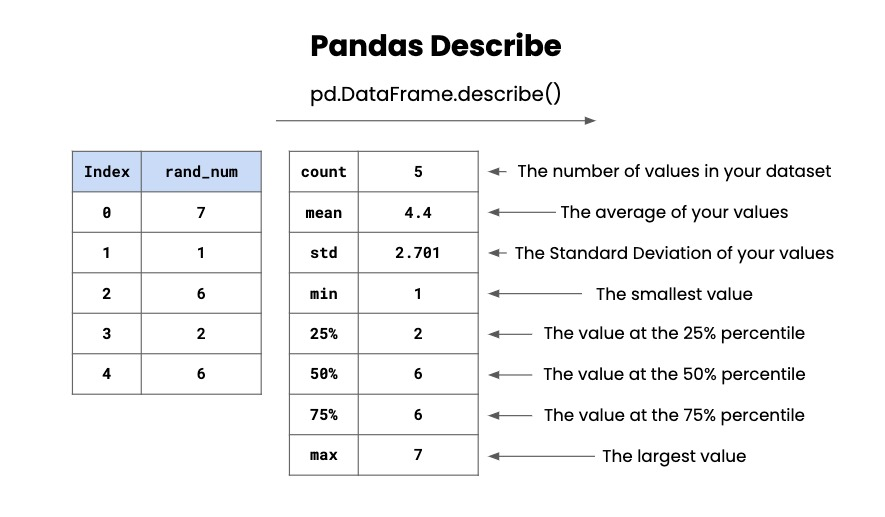



Let's use astype function:

In [ ]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category")

#### Converting variables with very less unique values to a categorical type in pandas, saves a lot of memory and makes processing efficient. As you can see, our dataset goes from 70.5 MB to 56.1 MB by doing this simple transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456153 entries, 0 to 456152
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Unnamed: 0.1                     456153 non-null  int64   
 1   Unnamed: 0                       456153 non-null  int64   
 2   FlightDate                       456153 non-null  object  
 3   Airline                          456153 non-null  category
 4   Flight_Number_Marketing_Airline  456153 non-null  int64   
 5   Origin                           456153 non-null  category
 6   Dest                             456153 non-null  category
 7   Cancelled                        456153 non-null  bool    
 8   Diverted                         456153 non-null  bool    
 9   CRSDepTime                       456153 non-null  int64   
 10  DepTime                          444190 non-null  float64 
 11  DepDelayMinutes                  444164 non-null  fl

In [ ]:
df['FlightDate']=pd.to_datetime(df['FlightDate'])

# Visualisations

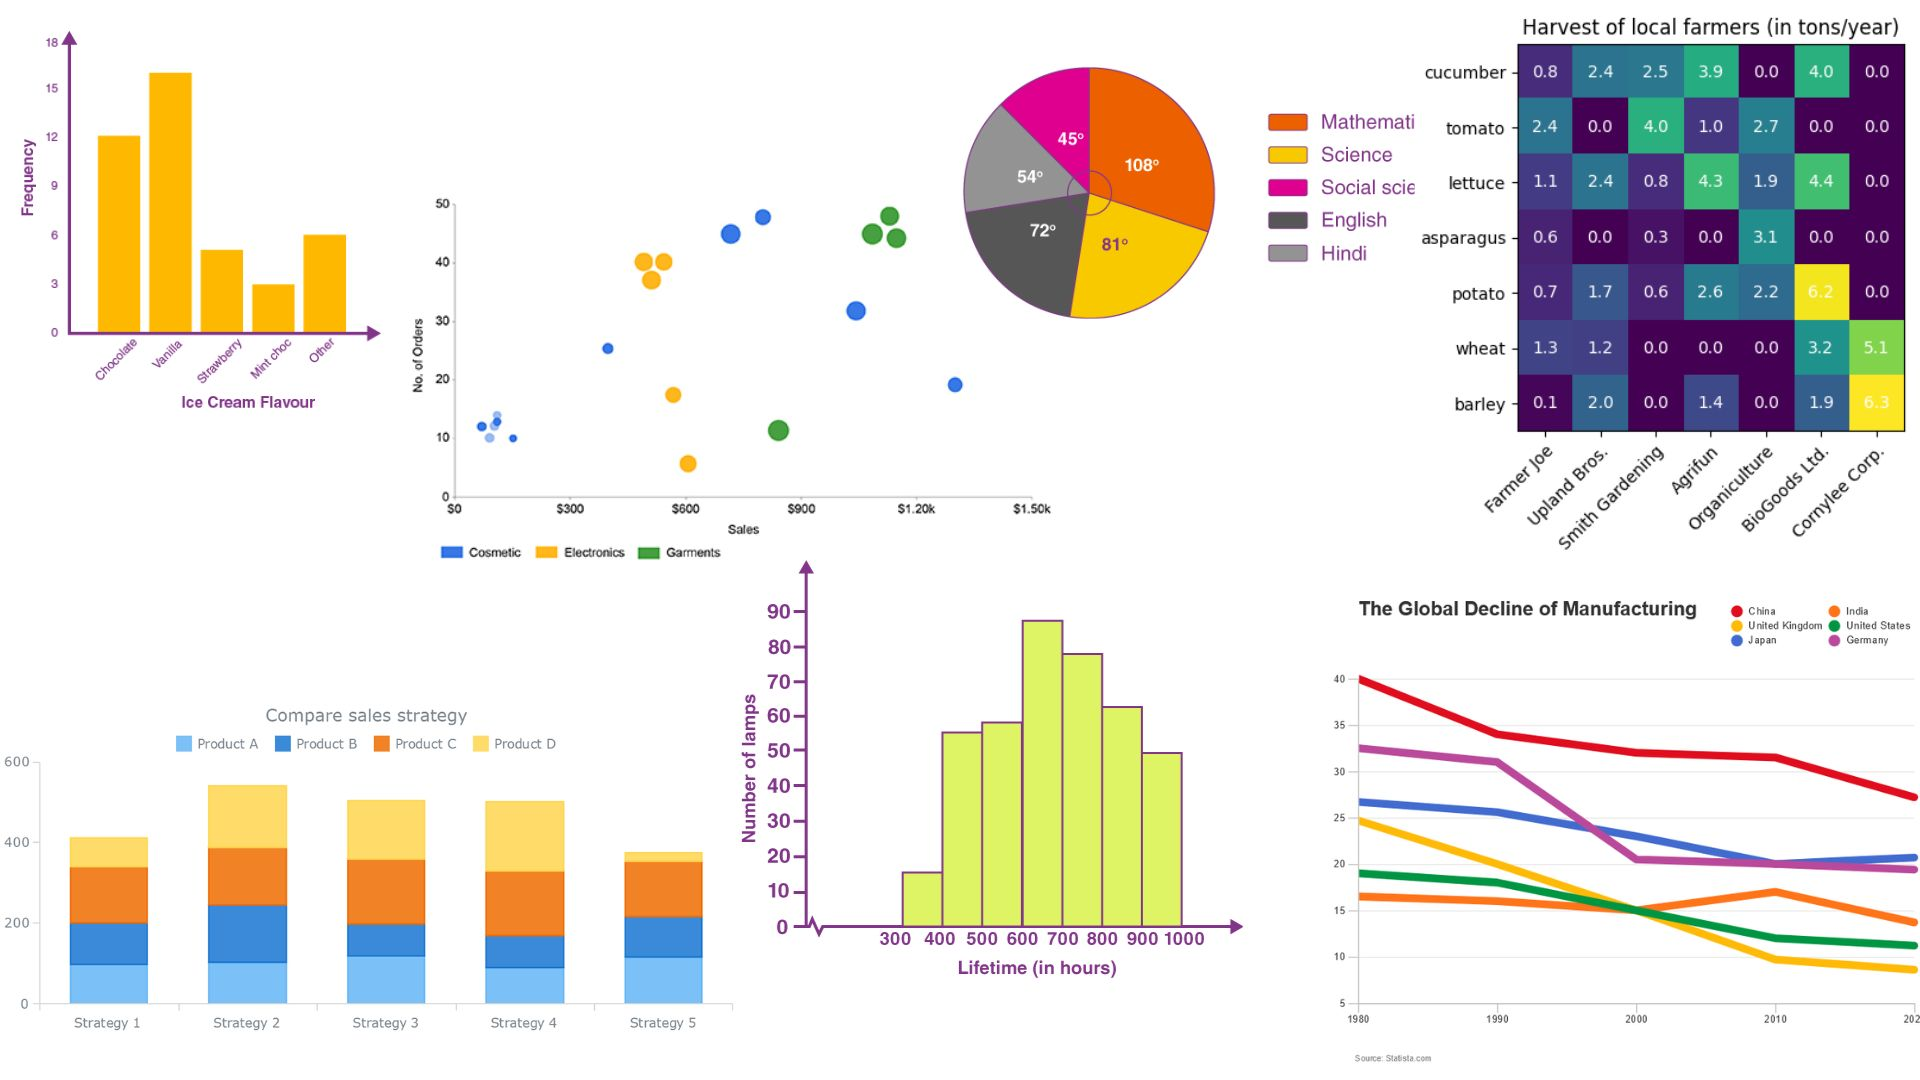

## Distribution of Flight Delays


value_counts method: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [ ]:
# value_counts returns a series containing counts of each unique values.
vis1 = df["DelayGroup"].value_counts(ascending=True)
print(vis1)

KeyError: ignored

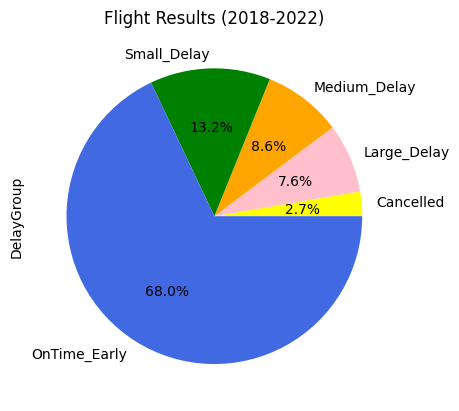

In [ ]:
# you can find the documentaion at (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
vis1.plot(
    kind="pie",
    autopct="%1.1f%%",
    title="Flight Results (2018-2022)",
    #wcolors=["yellow", "pink", "orange", "green", "royalblue"]
)  #show here itself how it can be converted to bar
plt.show()

## Try plotting what percetage of flights were Cancelled?

In [ ]:
vis2=df['Cancelled'].value_counts(ascending=True)
vis2

True      12232
False    443921
Name: Cancelled, dtype: int64

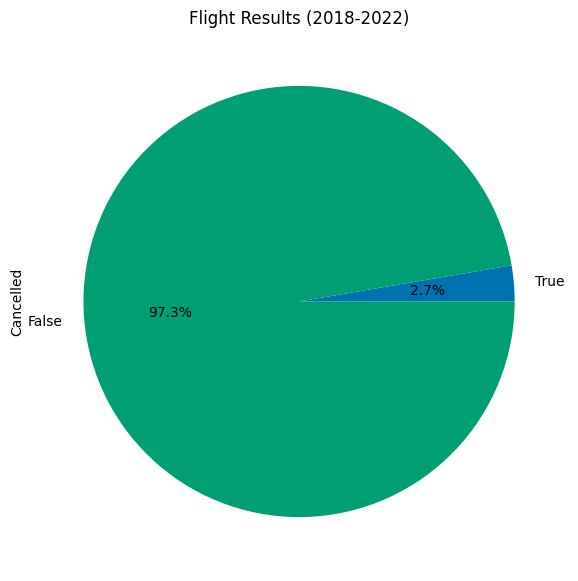

In [ ]:
vis2.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(7,7),
    title="Flight Results (2018-2022)",
)
plt.show()

## How Flight Delays follow a Normal Distribution

We can see here that most flights have a 1 minute or lower delay, meaning majority of the flights are actuallty either OnTime or Early

Query method: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [ ]:
vis2 = df.query("DepDelayMinutes < 60")
vis2

FlightDate                                    Airline  \
0      2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
1      2022-04-04   GoJet Airlines, LLC d/b/a United Express   
2      2022-04-04                Air Wisconsin Airlines Corp   
3      2022-04-04                Air Wisconsin Airlines Corp   
4      2022-04-04                Air Wisconsin Airlines Corp   
...           ...                                        ...   
456147 2019-01-14                   ExpressJet Airlines Inc.   
456148 2019-10-01                   ExpressJet Airlines Inc.   
456150 2019-04-01                   ExpressJet Airlines Inc.   
456151 2019-01-18                   ExpressJet Airlines Inc.   
456152 2019-01-18                   ExpressJet Airlines Inc.   

        Flight_Number_Marketing_Airline Origin Dest  Cancelled  Diverted  \
0                                  4301    GJT  DEN      False     False   
1                                  4183    DCA  EWR      False     False   
2                                  3908    ORD  TVC      False     False   
3                                  3812    CID  ORD      False     False   
4                                  3744    ORD  SGF      False     False   
...                                 ...    ...  ...        ...       ...   
456147                             4238    ORD  COU      False     False   
456148                             4241    DCA  EWR      False     False   
456150                             4245    ORD  BNA      False     False   
456151                             4247    ORD  DSM      False     False   
456152                             4250    IAH  MOB      False     False   

        CRSDepTime  DepTime  DepDelayMinutes  ...  OriginStateName  \
0             1133   1123.0              0.0  ...         Colorado   
1             1600   1600.0              0.0  ...         Virginia   
2             1820   1810.0              0.0  ...         Illinois   
3             1110   1103.0              0.0  ...             Iowa   
4              851    856.0              5.0  ...         Illinois   
...            ...      ...              ...  ...              ...   
456147        1937   1931.0              0.0  ...         Illinois   
456148         750    743.0              0.0  ...         Virginia   
456150        1530   1527.0              0.0  ...         Illinois   
456151        1010   1059.0             49.0  ...         Illinois   
456152        1940   1939.0              0.0  ...            Texas   

       DestAirportID       DestCityName  DestStateName TaxiOut TaxiIn  \
0              11292         Denver, CO       Colorado    17.0    8.0   
1              11618         Newark, NJ     New Jersey    18.0    7.0   
2              15380  Traverse City, MI       Michigan    13.0    3.0   
3              13930        Chicago, IL       Illinois     9.0   10.0   
4              14783    Springfield, MO       Missouri    21.0    6.0   
...              ...                ...            ...     ...    ...   
456147         11111       Columbia, MO       Missouri    20.0    4.0   
456148         11618         Newark, NJ     New Jersey    15.0    8.0   
456150         10693      Nashville, TN      Tennessee    16.0   18.0   
456151         11423     Des Moines, IA           Iowa    18.0    4.0   
456152         13422         Mobile, AL        Alabama    17.0    4.0   

        CRSArrTime  ArrTime  ArrDelayMinutes    DelayGroup  
0             1245   1228.0              0.0  OnTime_Early  
1             1744   1702.0              0.0  OnTime_Early  
2             2034   2012.0              0.0  OnTime_Early  
3             1234   1204.0              0.0  OnTime_Early  
4             1039   1038.0              0.0   Small_Delay  
...            ...      ...              ...           ...  
456147        2109   2052.0              0.0  OnTime_Early  
456148         909    852.0              0.0  OnTime_Early  
456150        1712   1701.0              0.0  OnTime_Early

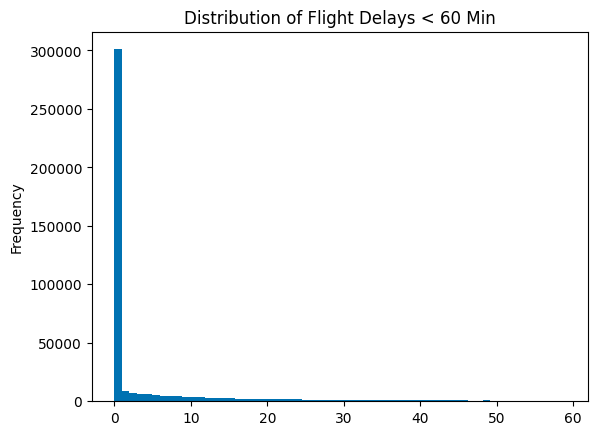

In [ ]:
vis2 = df.query("DepDelayMinutes < 60")["DepDelayMinutes"]
vis2.plot(
    kind="hist", bins=60, title="Distribution of Flight Delays < 60 Min"
)
plt.show()

Note: 0 and 1 minute delays have been removed for the next visualization as a delay of 1 minute is far more common and can't be considered as a delay

In [ ]:
vis3 = df.query("DepDelayMinutes >1 and DepDelayMinutes < 60")["DepDelayMinutes"]
print(vis3)
vis3.shape

4          5.0
9         48.0
16        10.0
17        24.0
23        21.0
          ... 
456107    23.0
456119    17.0
456122    13.0
456125    19.0
456151    49.0
Name: DepDelayMinutes, Length: 107527, dtype: float64


(107527,)

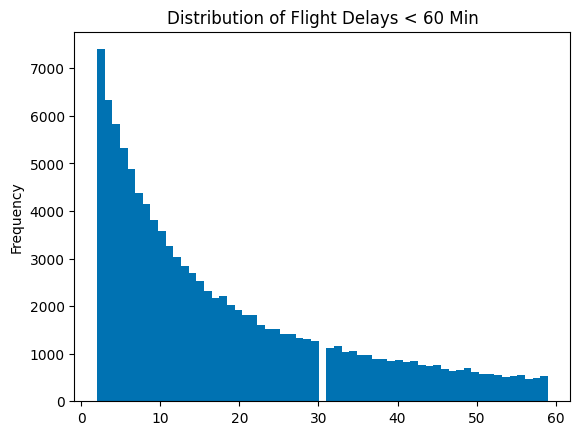

In [ ]:
plt2 = vis3.plot(
    kind="hist", bins=59, title="Distribution of Flight Delays < 60 Min"
)
plt.show()

#### Just this simple histogram of delays shows us quite a lot of interesting things.
- Firstly, like all things in nature, flight delays also follow a smooth normal distribution curve
- Secondly, there is an abdrupt dip in the number of flights having a delay of 30 mins, this may be due to the fact that Airlines are often known to publish 30 mins delays as a 29 mins delay so that it is perceived as a smaller number by the general audience.

- #### Like the normal distribution we saw previously, we can see here that majority of the flights are OnTime or Early (<=1 minute delay) followed by flights with a Small Delay (<15 minutes delay)

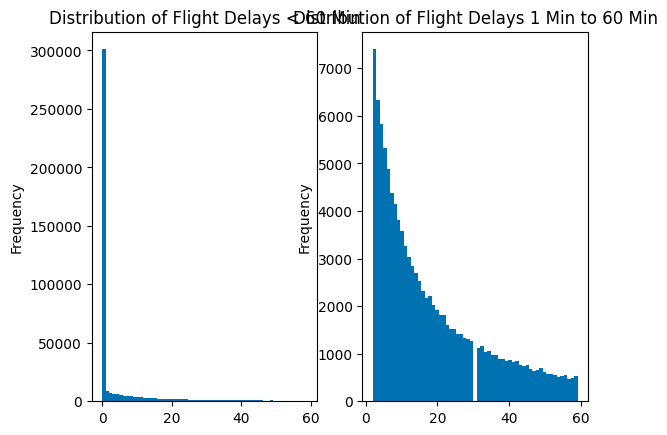

In [ ]:
plt.subplot(1, 2, 1)
vis2.plot(
    kind="hist", bins=60, title="Distribution of Flight Delays < 60 Min"
)

plt.subplot(1, 2, 2)
vis3.plot(
    kind="hist", bins=59, title="Distribution of Flight Delays 1 Min to 60 Min"
)

plt.show()

## Flights Per Year

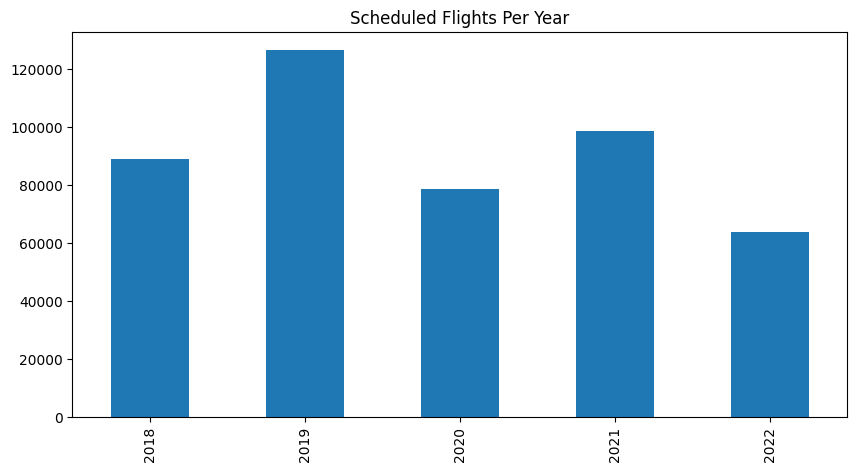

In [ ]:
#df["Year"] = df['FlightDate'].dt.year  #this is only possible coz data type was datetime
df['FlightDate'].dt.year.value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

In [ ]:
df["Year"] = df["FlightDate"].dt.year #Similarly you can do dt.month & dt.year

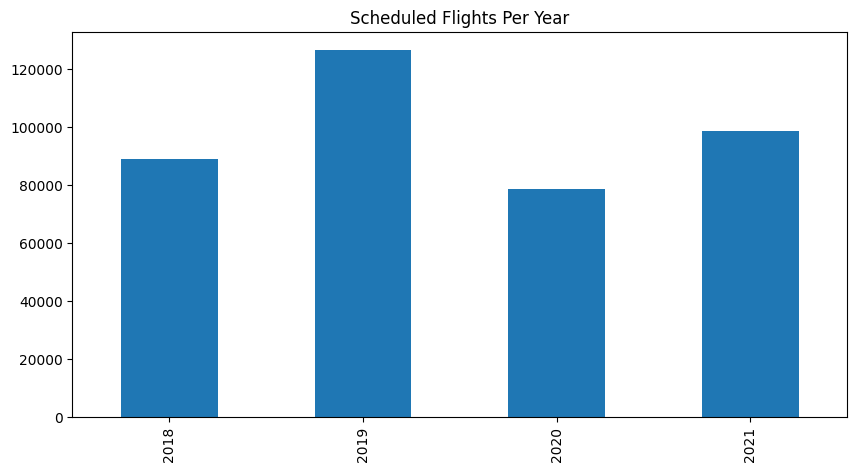

In [ ]:
df.query("Year != 2022")["Year"].value_counts().sort_index().plot( kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year" )
plt.show()

- #### We see here that as the economy of the US advanced from 2018 to 2019, the number of flights increased. 2018 in the US also saw severe winters as well Hurricane Florence leading to lower flights than 2019.
- #### As the COVID-19 pandemic hit the world in 2020, we see a sharp decrease in the number of flights of 2020.
- #### As the world recovered from the COVID-19 pandemic in 2021, we see an increase in  the number of flights.
- #### Taken data source is only till July of 2022 and hence the lower number of flights in the visualization.

In [ ]:
# Group by Year and Delay_Group, and then count the occurrences
df_agg = df.groupby("Year")["DelayGroup"].value_counts().unstack()  #show with and without unstack
print(df_agg)

DelayGroup  Cancelled  Large_Delay  Medium_Delay  OnTime_Early  Small_Delay
Year                                                                       
2018             1426         7395          8464         58922        12677
2019             2459        11040         11475         84248        17210
2020             4691         2901          3546         60912         6425
2021             1763         7159          8880         67091        13730
2022             1893         6038          7003         38801         9989


## Results by Year

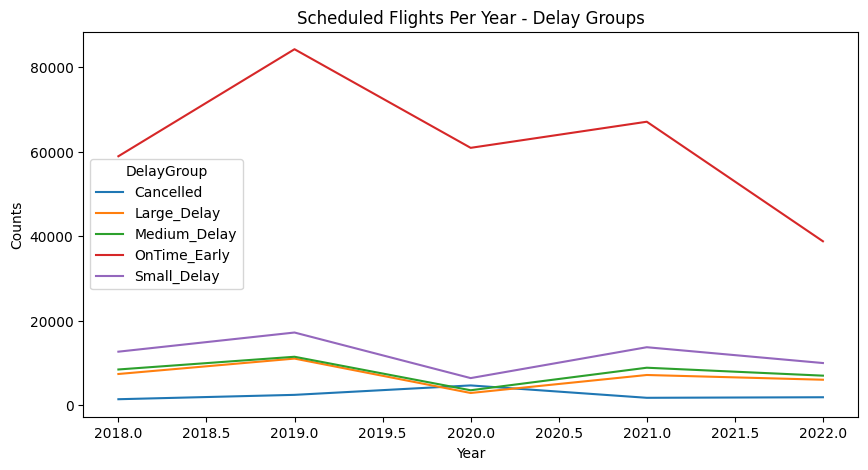

In [ ]:
# Plotting multiple line plots for each delay group
ax = df_agg.plot(kind="line", figsize=(10, 5))
ax.set_title("Scheduled Flights Per Year - Delay Groups")
ax.set_xlabel("Year")
ax.set_ylabel("Counts")
plt.show()

In [ ]:
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() *100   #show with and wihtout unstack #show with and without percentage
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")                              #https://pandas.pydata.org/docs/user_guide/style.html

- #### Analysing the Flight Cancellations by year, we can see that 2020 saw an astronomically high 6% flight cancellation due to the COVID-19 pandemic.
- #### Interestingly, 2020 was also the year with the most percentage of Flights being OnTime/Early. This may be due to the dramatically reduced Air Traffic in 2020.

## Results by Month

Let's learn group by first:


In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

- #### We see here that the Summer months of May to August in the US, have a high percentage of flights delayed. This may be due to the following reasons:
    1. May through August is the peak summer travel season in the US, and this period can bring more severe weather conditions, such as thunderstorms and hurricanes, which can cause flight delays.
    2. The summer months also tend to see higher passenger volume, which can lead to congestion at airports, longer security lines, and longer boarding times which may in turn lead to delayed flights
    3. Airlines may perform more maintenance and repairs on their planes during the quieter fall and winter months, which can reduce the risk of unexpected maintenance issues causing delays.

- #### We can also see that the months of September to November in the US see a higher percentage of flights that are OnTime/Early, this may be because of the following reasons:
    1. In September through November, the weather tends to be more favorable across much of the US, with fewer storms and milder temperatures, which can lead to more on-time or early flights.
    2. The months of September through November also see a reduced amount of travellers as the holiday season is over and its mostly an off season for the travel industry in general.
    
- #### Another observation we make is that March and April seem to have an astronomically high percentage of cancellations, apart from some weather conditions there doesn't seem to be a reason for this abnormality on the surface.

- #### BUT, if we think deeper, March and April were the months when the COVID-19 disease was officially announced as a pandemic, lockdowns were put in place and restrictions were applied on travel, back in 2020.

- #### So to check if our hypothesis is correct, let us do the same plot but without the year 2020 this time around.

## Exclude 2020

In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year != 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

- #### Now that the year 2020 has been removed, we see the high amount of cancellations in March/April that we saw in the previous vizz are no longer visible. Thus our hypothesis was correct.

## Why High Cancellation in March/April? What does it look like by year for these months?

In [ ]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("3 <= Month <= 4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges", axis=0)

- #### This graph further strenghtens our previous hypothesis. Here we have filtered the stats for only March and April throughout the years and we can see that there were high amount of cancellations in the March and April months of 2020 presumably due to the COVID-19 pandemic.

## Visualizing using CalPlot

In [ ]:
!pip install calmap    #introduce to them ke aise weird libraries google karke randomly milte hai

#https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/

#### We now do a Calendar Plot to visualise the Flight cancellations througout the year.
- #### We can see that from the middle of March to the end of April of 2020, flight cancellation numbers have skyrocketed, this is because of the airlines cancelling flights due to the COVID-19 pandemic.

Text(0.5, 0.92, 'US Flight Cancellations')

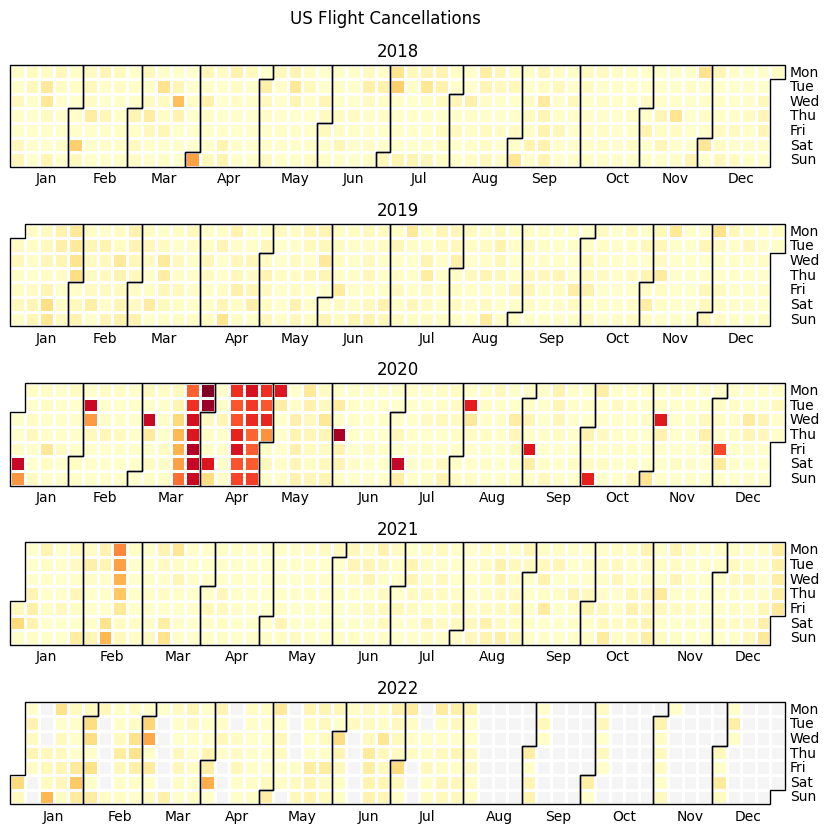

In [ ]:
import calmap
events = df.groupby("FlightDate")["Cancelled"].mean()
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events, year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.suptitle("US Flight Cancellations", y=0.92)

## Compare Airlines
- Who has the most delays?
- Who has the most cancellations?
- Who is the most reliable? (on time)

Text(0.5, 0, 'Flights (10k)')

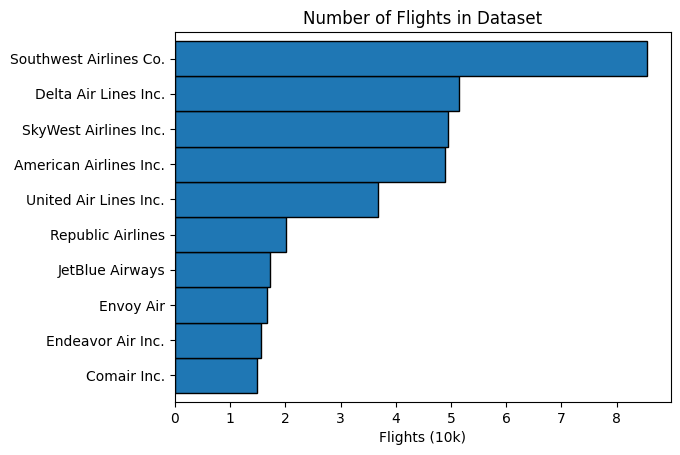

In [ ]:
fig, ax = plt.subplots()
airlines_ordered = (df["Airline"].value_counts(ascending=True).tail(10)/ 10_000).plot(
    kind="barh", width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (10k)")

Text(0.5, 0, 'Flights (10k)')

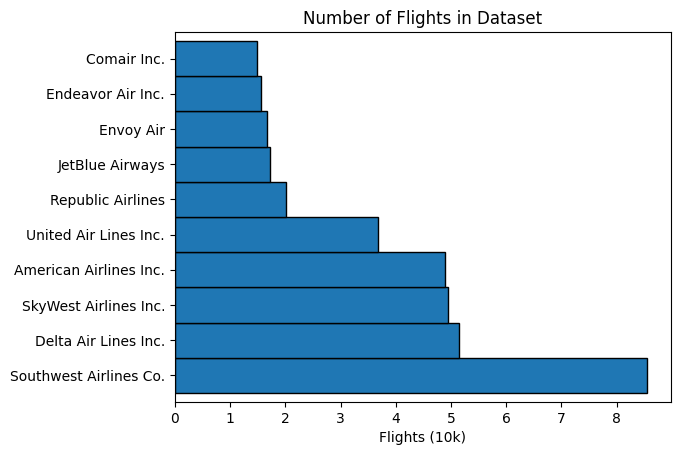

In [ ]:
fig, ax = plt.subplots()
airlines_ordered = (df["Airline"].value_counts(ascending=False).head(10)/ 10_000).plot(
    kind="barh", width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (10k)")

- #### Here we can see that Southwest Airlines had the most number of airlines followed by Delta, SkyWest, American and United Airlines.
- #### On the other end of the spectrum, Airlines like Empire Airlines, Virgin America, Peninsula Airways And Cape Air had little to no flights in the US from 2018 to 2022.

## Subset to the Top Airlines #FUCKOFF YE NAI PADHANA CLASS MAI

- ##### Minimum 10000 Flights
- ##### We will now analyse the top airlines (with more than a million flights) from 2018-2022

In [ ]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 10000")["index"]
    .values.tolist()
)

df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [ ]:
# Reset airline categories
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

In [ ]:
df_top

FlightDate                 Airline  Flight_Number_Marketing_Airline  \
0      2022-01-04  Southwest Airlines Co.                             1057   
1      2022-01-04  Southwest Airlines Co.                             1024   
2      2022-01-04  Southwest Airlines Co.                             1113   
3      2022-01-04  Southwest Airlines Co.                              269   
4      2022-01-04  Southwest Airlines Co.                             1629   
...           ...                     ...                              ...   
395739 2019-01-30      Mesa Airlines Inc.                             6285   
395740 2019-01-01      Mesa Airlines Inc.                             6334   
395741 2019-01-27      Mesa Airlines Inc.                             6242   
395742 2019-08-01      Mesa Airlines Inc.                             6260   
395743 2019-01-14      Mesa Airlines Inc.                             6334   

       Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  \
0         ATL  AUS      False     False        1440   1505.0             25.0   
1         ATL  OMA      False     False        1250   1303.0             13.0   
2         AUS  HOU      False     False         640    701.0             21.0   
3         BDL  DEN      False     False         730    726.0              0.0   
4         BNA  LAS      False     False        1455   1458.0              3.0   
...       ...  ...        ...       ...         ...      ...              ...   
395739    IAD  CLE      False     False        2200   2240.0             40.0   
395740    IAD  LGA      False     False        1705   1702.0              0.0   
395741    DAY  IAH      False     False         630    630.0              0.0   
395742    LGA  IAD      False     False        1020   1012.0              0.0   
395743    IAD  LGA      False     False        1710   1737.0             27.0   

        ...  DestStateName TaxiOut TaxiIn  CRSArrTime ArrTime ArrDelayMinutes  \
0       ...          Texas    11.0    7.0        1615  1632.0            17.0   
1       ...       Nebraska    13.0    4.0        1415  1415.0             0.0   
2       ...          Texas     8.0    3.0         735   744.0             9.0   
3       ...       Colorado    15.0    4.0        1000   934.0             0.0   
4       ...         Nevada    13.0    5.0        1705  1651.0             0.0   
...     ...            ...     ...    ...         ...     ...             ...   
395739  ...           Ohio    32.0    9.0        2322    17.0            55.0   
395740  ...       New York    21.0    7.0        1848  1809.0             0.0   
395741  ...          Texas    42.0    7.0         830   838.0             8.0   
395742  ...       Virginia    31.0    5.0        1149  1136.0             0.0   
395743  ...       New York    23.0    7.0        1844  1848.0             4.0   

          DelayGroup  Year  Month  DelayOk  
0       Medium_Delay  2022      1      Bad  
1        Small_Delay  2022      1     Good  
2       Medium_Delay  2022      1      Bad  
3       OnTime_Early  2022      1     Good  
4        Small_Delay  2022      1     Good  
...              ...   ...    ...      ...  
395739  Medium_Delay  2019      1      Bad  
395740  OnTime_Early  2019      1     Good  
395741  OnTime_Early  2019      1     Good  
395742  OnTime_Early  2019      8     Good  
395743  Medium_Delay  2019      1      Bad  

[395744 rows x 25 columns]

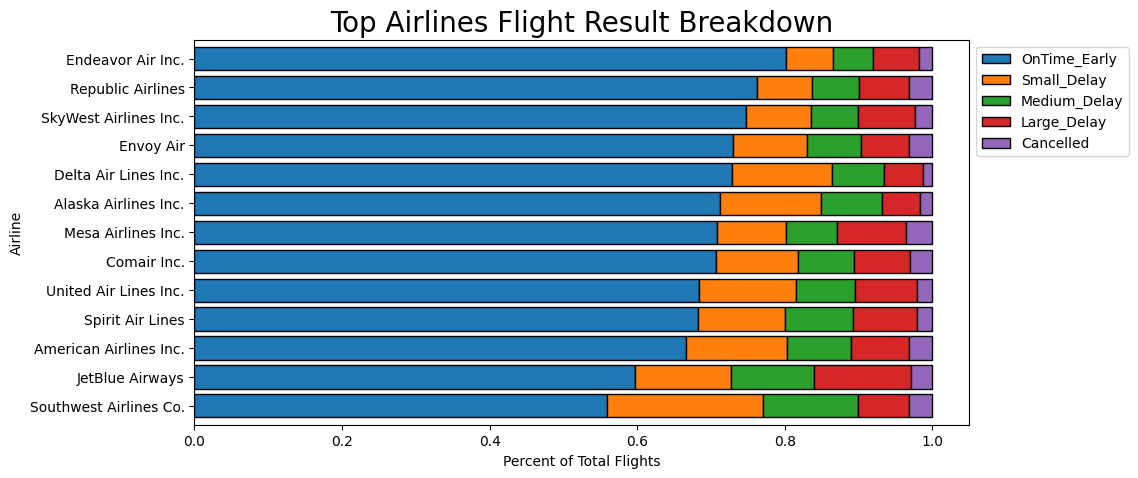

In [ ]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [ ]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

In [ ]:
df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

- ##### Envoy Air along with Southwest and American Airlines seem to have the most cancelled flights.
- ##### Jetblue has a considerably high percentage of Large Delays with a high percentage of cancelled flights as well with a comparatively lower percentage of flights being OnTime/Early.
- ##### Delta Airlines has the least number of cancellations, least number of Large and Medium Delays with a high percentage of flights being OnTime/Early.
- ##### Hence, we can say that Delta Airlines is the most reliable airlines and Jetblue is the least reliable.

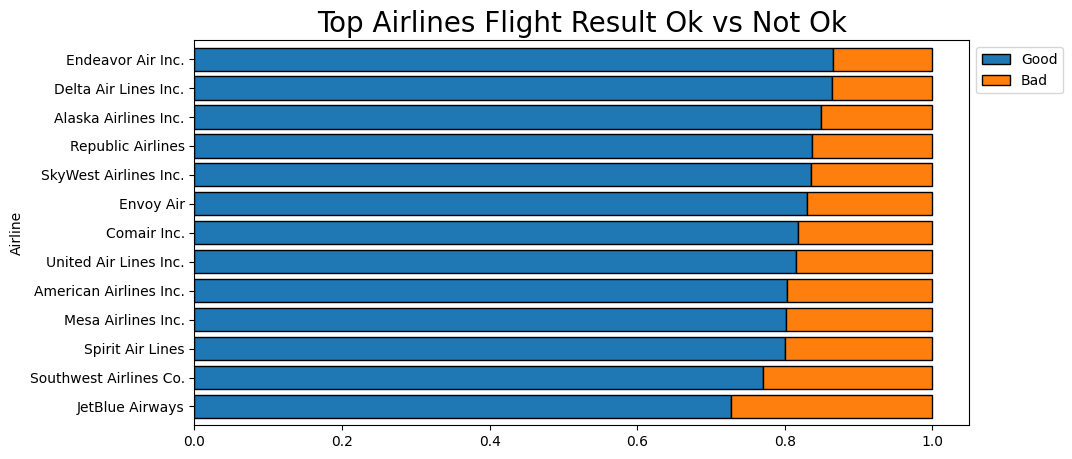

In [ ]:
df_agg = (
    df_top.groupby(["Airline"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()

- ##### Above visualization summarises our findings at a higher level of abstraction.

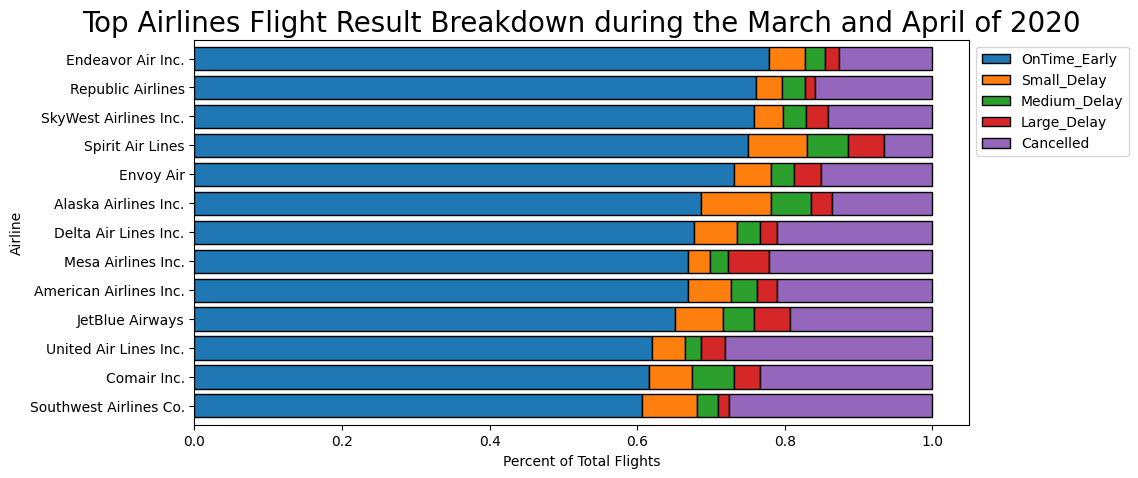

In [ ]:
df_v=df_top[df_top['Year']==2020]
df_vizz=df_v.query("3 <= Month <= 4")

col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_vizz.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown during the March and April of 2020", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

#### This is an analysis of Flights during the March-April months of 2020 when the world was hit with the COVID-19 pandemic and many flights were cancelled.
- ##### Southwest Airlines had the highest percentage of flights been canclled and the lowest pecentage of OnTime/Early flights.
- ##### On the other hand, SkyWest has the least percentage of flights cancelled and the highest pecentage of OnTime/Early flights.
- ##### So SkyWest was the most reliable airline during the March-April months of 2020 and Southwest was the least reliable in the same period.

## Compare Airports
- ##### Which cities have the busiest airports?
- ##### Which cities have the most reliable airports?
- ##### Which cities have the airports with the highest cancellation percentage?

In [ ]:
city_counts = df['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

city_counts

OriginCityName  Count
0              Chicago, IL  26631
1              Atlanta, GA  21392
2               Denver, CO  18182
3    Dallas/Fort Worth, TX  17217
4             New York, NY  14967
..                     ...    ...
375             Bishop, CA      4
376         Wilmington, DE      3
377               Rota, TT      1
378           Cold Bay, AK      1
379          Pago Pago, TT      1

[380 rows x 2 columns]

- ##### Here we can see that Chicago along with Atlanta, Denver, Dallas and Ney York are some of the busiest airports in the country.

In [ ]:
# df_n=df.query("3 <= Month <= 4 and Year==2020")
# city_counts = df_n['OriginCityName'].value_counts().reset_index()
# city_counts.columns = ['OriginCityName', 'Count']
# city=city_counts[city_counts['Count']>5000]
# px.bar(city,x='OriginCityName',y='Count',text_auto='.2s',title='Busiest Airports in the past 4 years')

- ##### Here we can see that during the COVID months, Chicago, Atlanta and Dallas were some of the busiest airports.

In [ ]:
# city_counts = df['OriginCityName'].value_counts().reset_index()
# city_counts.columns = ['OriginCityName', 'Count']

# df_new=pd.merge(df, city_counts, on='OriginCityName')

# df_agg = (
#     df_new.query("Count>=400000")
#     .groupby("OriginCityName")["DelayGroup"]
#     .value_counts(normalize=True)
#     .unstack()
#     * 100
# )
# col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

# fig, ax = plt.subplots(figsize=(10, 5))
# df_agg.sort_values("OnTime_Early").plot(
#     kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
# )
# ax.legend(bbox_to_anchor=(1, 1))
# ax.set_title("Busiest Airports Flight Result Breakdown", fontsize=20)
# ax.set_xlabel("Percent of Total Flights")
# plt.show()

#### This is an analysis of the flight delays and cancellations at some of the busiest airports in the US.
- ##### We can see here that Newark and New York have the highest amount of flight cancellations and comparatively lower OnTime/Early flights, this may be because they are some of the busiest.
- ##### Salt Lake City, Utah along with Minneapolis has some of the least percentage of cancelled flights and one of the highest percentage of flights that are OnTime/Early.
- ##### This makes Salt Lake City and Minneapolis Internation Airports the most reliable in the US with New York and Newark International Airports being the least reliable.

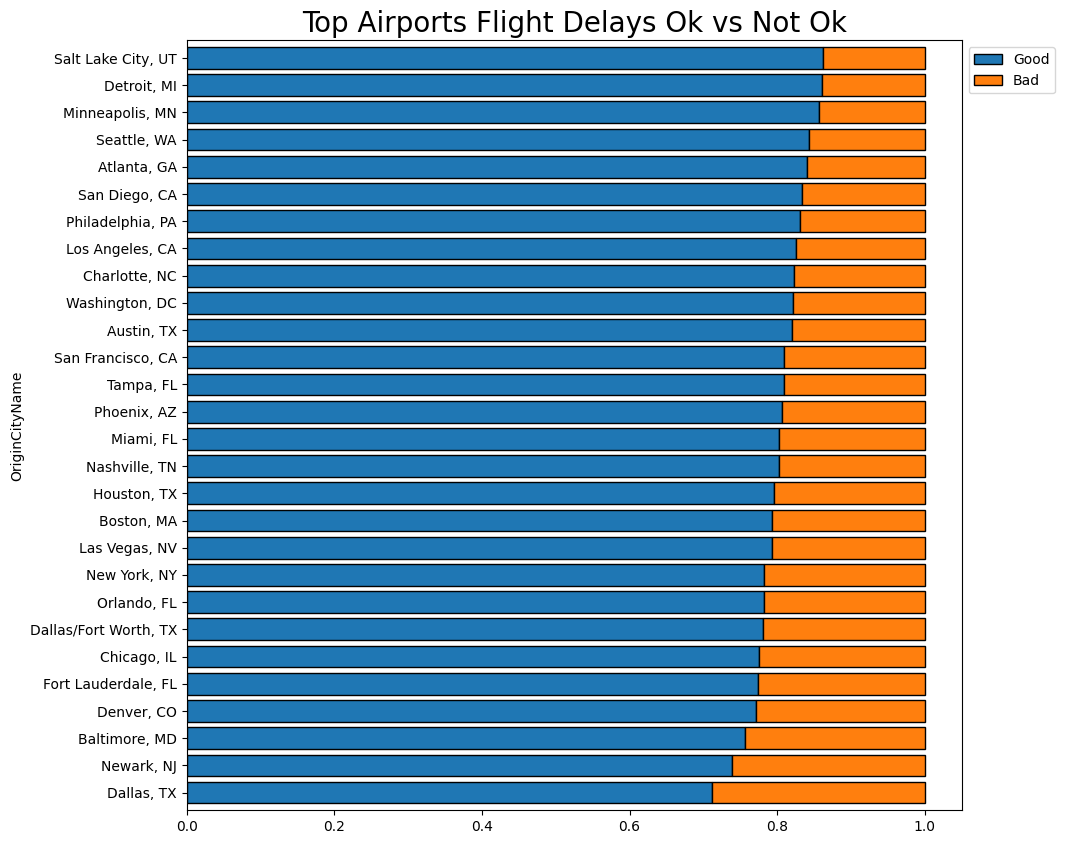

In [ ]:
city_counts = df_top['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

df_new=pd.merge(df_top, city_counts, on='OriginCityName')


df_agg = (
    df_new.query("Count>=4000")
    .groupby(["OriginCityName"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 10))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airports Flight Delays Ok vs Not Ok", fontsize=20)

plt.show()

In [ ]:
df_agg

DelayOk                    Good       Bad
OriginCityName                           
Atlanta, GA            0.840335  0.159665
Austin, TX             0.820035  0.179965
Baltimore, MD          0.756581  0.243419
Boston, MA             0.793203  0.206797
Charlotte, NC          0.822596  0.177404
Chicago, IL            0.775588  0.224412
Dallas, TX             0.711981  0.288019
Dallas/Fort Worth, TX  0.780373  0.219627
Denver, CO             0.771614  0.228386
Detroit, MI            0.860684  0.139316
Fort Lauderdale, FL    0.774278  0.225722
Houston, TX            0.795749  0.204251
Las Vegas, NV          0.792482  0.207518
Los Angeles, CA        0.825279  0.174721
Miami, FL              0.802741  0.197259
Minneapolis, MN        0.856510  0.143490
Nashville, TN          0.802586  0.197414
New York, NY           0.782290  0.217710
Newark, NJ             0.739124  0.260876
Orlando, FL            0.781665  0.218335
Philadelphia, PA       0.830818  0.169182
Phoenix, AZ            0.806839  0.193161
Salt Lake City, UT     0.861698  0.138302
San Diego, CA          0.833466  0.166534
San Francisco, CA      0.809131  0.190869
Seattle, WA            0.842602  0.157398
Tampa, FL              0.808943  0.191057
Washington, DC         0.821399  0.178601

In [ ]:
sns.countplot(x=df_agg["DelayOk"])

KeyError: ignored

- ##### Above visualization summarises our findings at a higher level of abstraction.

In [ ]:
city_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OriginCityName  349 non-null    object
 1   Count           349 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
df.head()

FlightDate                                    Airline  \
0 2022-04-04  Commutair Aka Champlain Enterprises, Inc.   
1 2022-04-04   GoJet Airlines, LLC d/b/a United Express   
2 2022-04-04                Air Wisconsin Airlines Corp   
3 2022-04-04                Air Wisconsin Airlines Corp   
4 2022-04-04                Air Wisconsin Airlines Corp   

   Flight_Number_Marketing_Airline Origin Dest  Cancelled  Diverted  \
0                             4301    GJT  DEN      False     False   
1                             4183    DCA  EWR      False     False   
2                             3908    ORD  TVC      False     False   
3                             3812    CID  ORD      False     False   
4                             3744    ORD  SGF      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  ...       DestCityName DestStateName  \
0        1133   1123.0              0.0  ...         Denver, CO      Colorado   
1        1600   1600.0              0.0  ...         Newark, NJ    New Jersey   
2        1820   1810.0              0.0  ...  Traverse City, MI      Michigan   
3        1110   1103.0              0.0  ...        Chicago, IL      Illinois   
4         851    856.0              5.0  ...    Springfield, MO      Missouri   

  TaxiOut  TaxiIn CRSArrTime ArrTime  ArrDelayMinutes    DelayGroup  Year  \
0    17.0     8.0       1245  1228.0              0.0  OnTime_Early  2022   
1    18.0     7.0       1744  1702.0              0.0  OnTime_Early  2022   
2    13.0     3.0       2034  2012.0              0.0  OnTime_Early  2022   
3     9.0    10.0       1234  1204.0              0.0  OnTime_Early  2022   
4    21.0     6.0       1039  1038.0              0.0   Small_Delay  2022   

   Month  
0      4  
1      4  
2      4  
3      4  
4      4  

[5 rows x 24 columns]

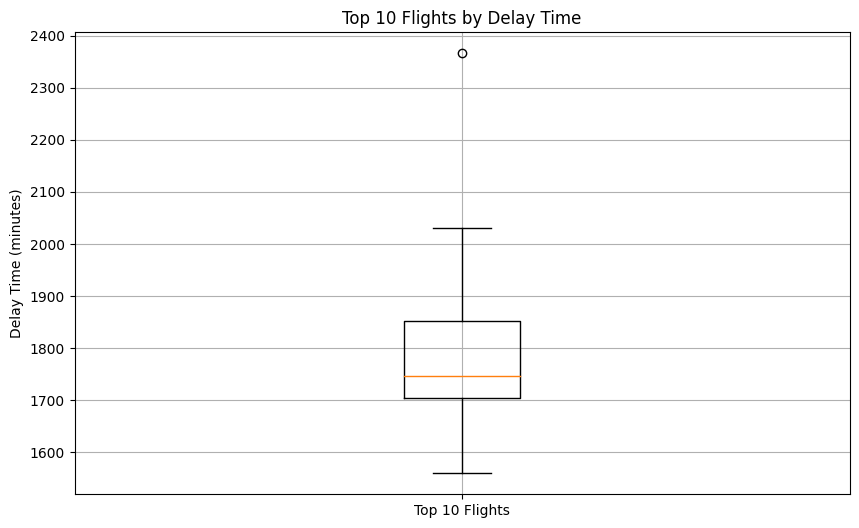

In [ ]:
df_sorted = df.sort_values(by='DepDelayMinutes', ascending=False)

# Step 3: Select the top 10 flights
top_10_flights = df_sorted.head(10)

# Step 4: Create a box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(top_10_flights['DepDelayMinutes'])
plt.title('Top 10 Flights by Delay Time')
plt.ylabel('Delay Time (minutes)')
plt.xticks([1], ['Top 10 Flights'])
plt.grid(True)
plt.show()


# Data Transformation for Machine Learning

In [ ]:
df_top['OriginCityName'].nunique()

349

In [ ]:
df_top['DestCityName'].nunique()

350

In [ ]:
df["DelayOk"] = df["DelayGroup"].map(delay_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['Airline']=le1.fit_transform(df['Airline'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
df['Origin']=le2.fit_transform(df['Origin'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
df['Dest']=le3.fit_transform(df['Dest'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le4=LabelEncoder()
df['Cancelled']=le4.fit_transform(df['Cancelled'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le5=LabelEncoder()
df['Diverted']=le5.fit_transform(df['Diverted'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le6=LabelEncoder()
df['OriginCityName']=le6.fit_transform(df['OriginCityName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le7=LabelEncoder()
df['DestCityName']=le7.fit_transform(df['DestCityName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le8=LabelEncoder()
df['OriginStateName']=le8.fit_transform(df['OriginStateName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le9=LabelEncoder()
df['DestStateName']=le9.fit_transform(df['DestStateName'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le10=LabelEncoder()
df['DelayGroup']=le10.fit_transform(df['DelayGroup'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le11=LabelEncoder()
df['DelayOk']=le11.fit_transform(df['DelayOk'])

In [ ]:
df.isnull().sum() #sum nikalke aur add karke batana hai

FlightDate                             0
Airline                                0
Flight_Number_Marketing_Airline        0
Origin                                 0
Dest                                   0
Cancelled                              0
Diverted                               0
CRSDepTime                             0
DepTime                            11963
DepDelayMinutes                    11989
OriginAirportID                        0
OriginCityName                         0
OriginStateName                        0
DestAirportID                          0
DestCityName                           0
DestStateName                          0
TaxiOut                            12279
TaxiIn                             12479
CRSArrTime                             0
ArrTime                            12367
ArrDelayMinutes                    13282
DelayGroup                             0
Year                                   0
Month                                  0
DelayOk         

In [ ]:
df.dropna(inplace=True)

In [ ]:
# df_new=df[df['Year']==2022]

In [ ]:
df.head()

FlightDate  Airline  Flight_Number_Marketing_Airline  Origin  Dest  \
0 2022-04-04        7                             4301     144    98   
1 2022-04-04       15                             4183      96   123   
2 2022-04-04        0                             3908     265   368   
3 2022-04-04        0                             3812      72   264   
4 2022-04-04        0                             3744     265   332   

   Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  ...  \
0          0         0        1133   1123.0              0.0  ...   
1          0         0        1600   1600.0              0.0  ...   
2          0         0        1820   1810.0              0.0  ...   
3          0         0        1110   1103.0              0.0  ...   
4          0         0         851    856.0              5.0  ...   

   DestStateName  TaxiOut  TaxiIn  CRSArrTime  ArrTime  ArrDelayMinutes  \
0              5     17.0     8.0        1245   1228.0              0.0   
1             29     18.0     7.0        1744   1702.0              0.0   
2             21     13.0     3.0        2034   2012.0              0.0   
3             12      9.0    10.0        1234   1204.0              0.0   
4             24     21.0     6.0        1039   1038.0              0.0   

   DelayGroup  Year  Month  DelayOk  
0           3  2022      4        1  
1           3  2022      4        1  
2           3  2022      4        1  
3           3  2022      4        1  
4           4  2022      4        1  

[5 rows x 25 columns]

# **Machine Learning Model:-**

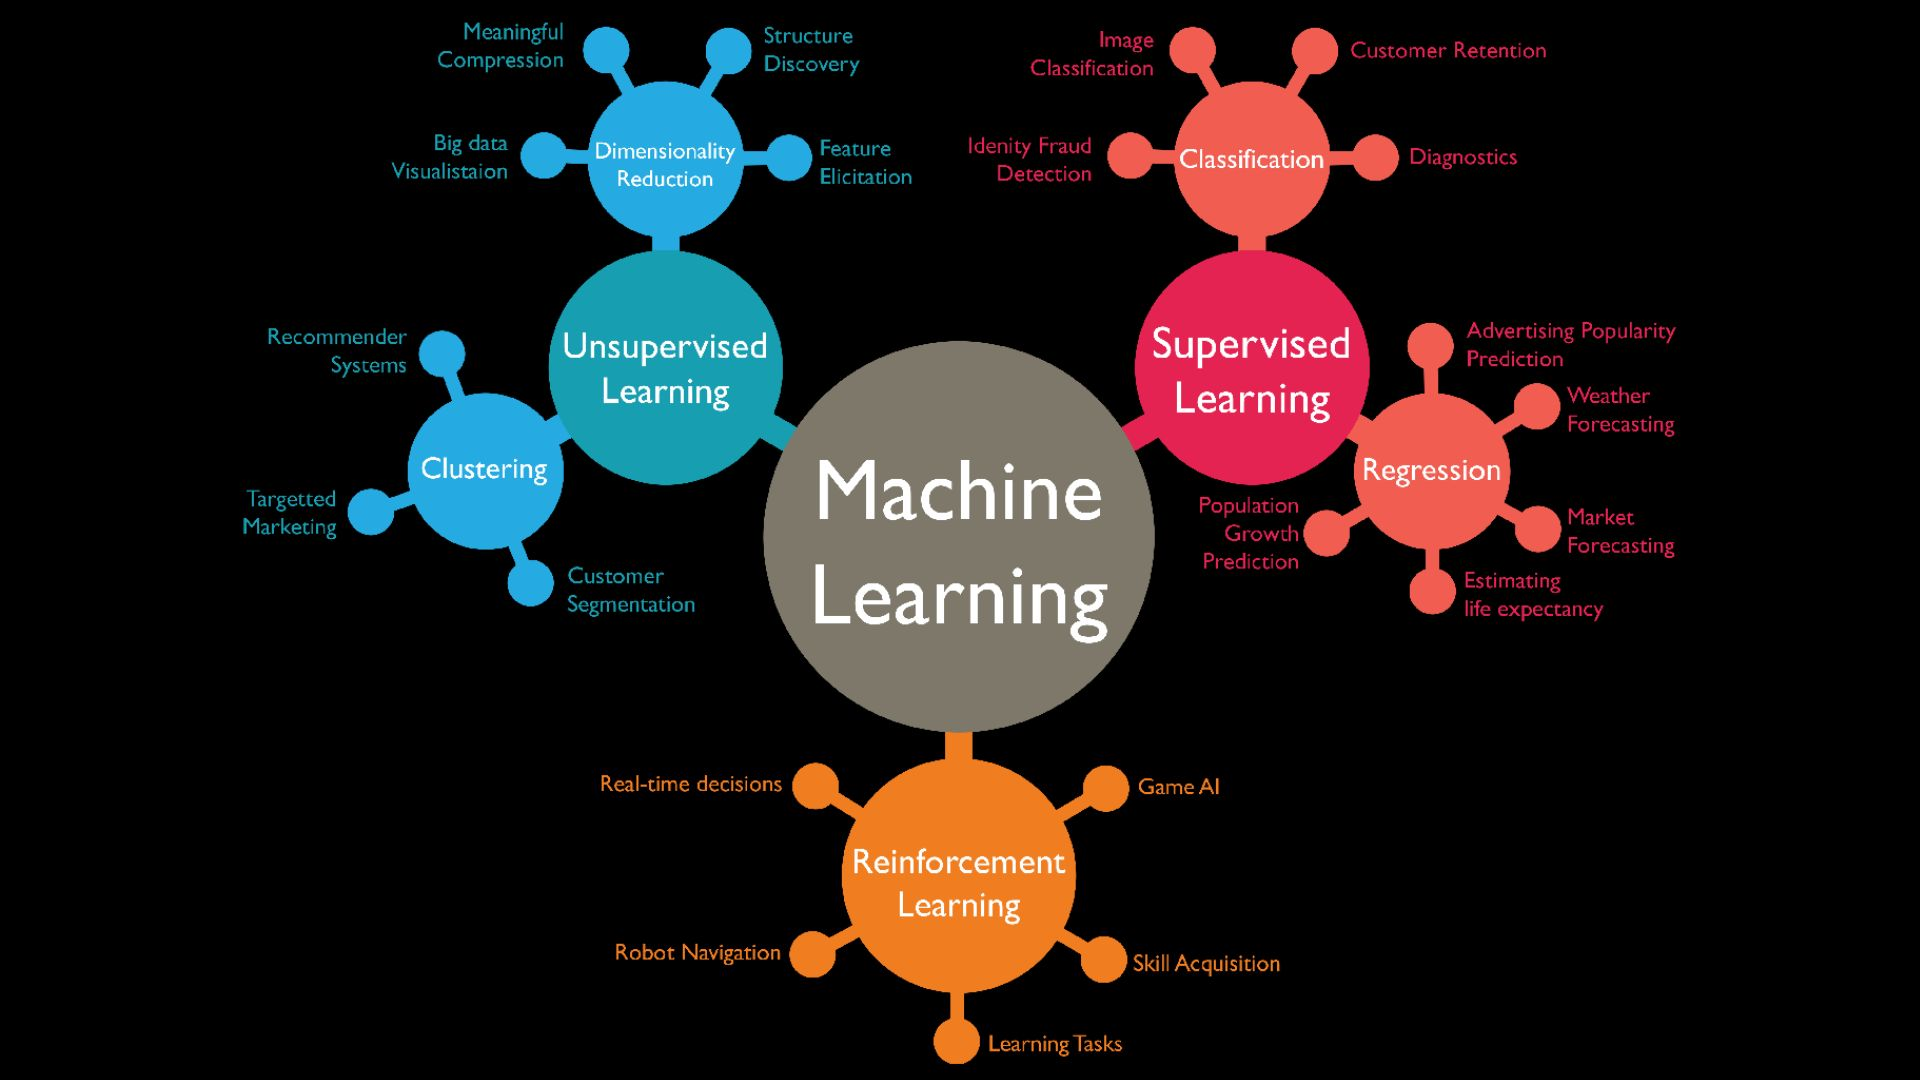

# Supervised learning

---


### It is the most common type of machine learning. It is used when you have labeled data, meaning that you know the desired output for each input.


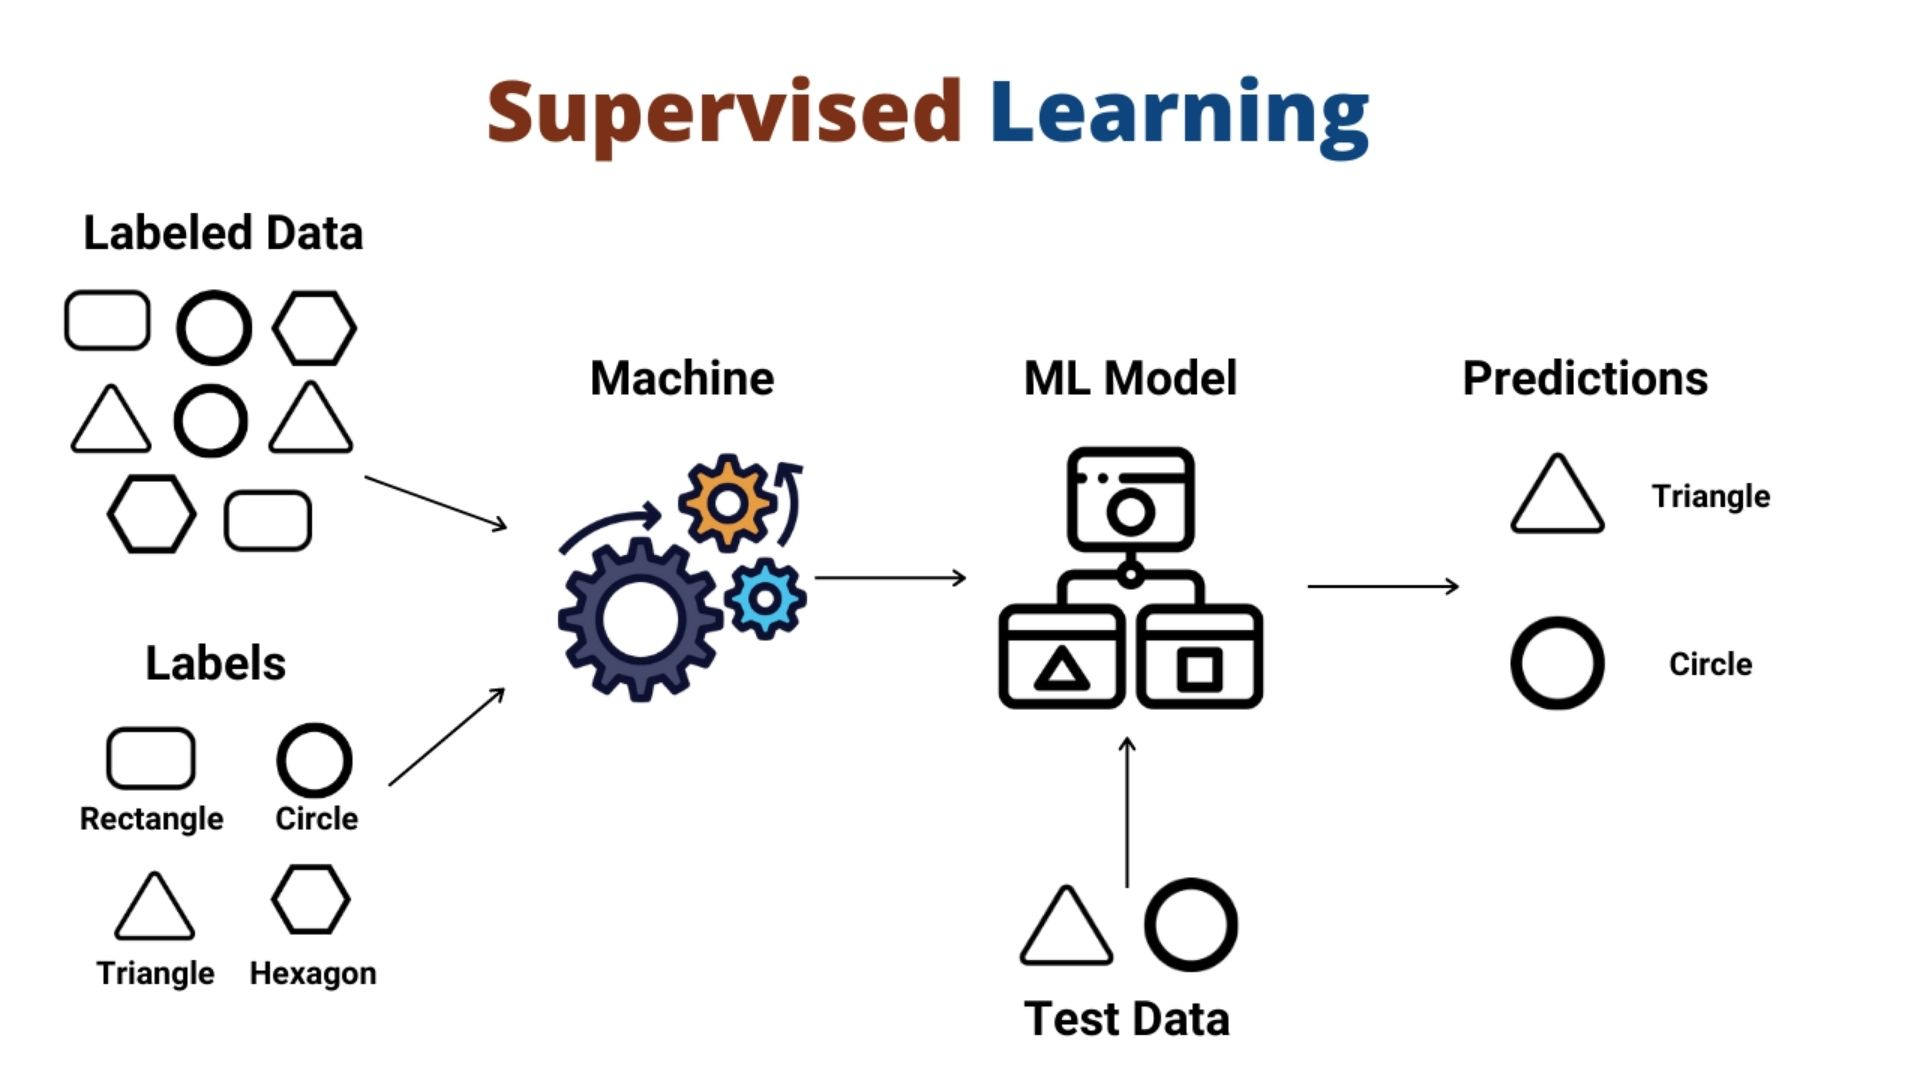

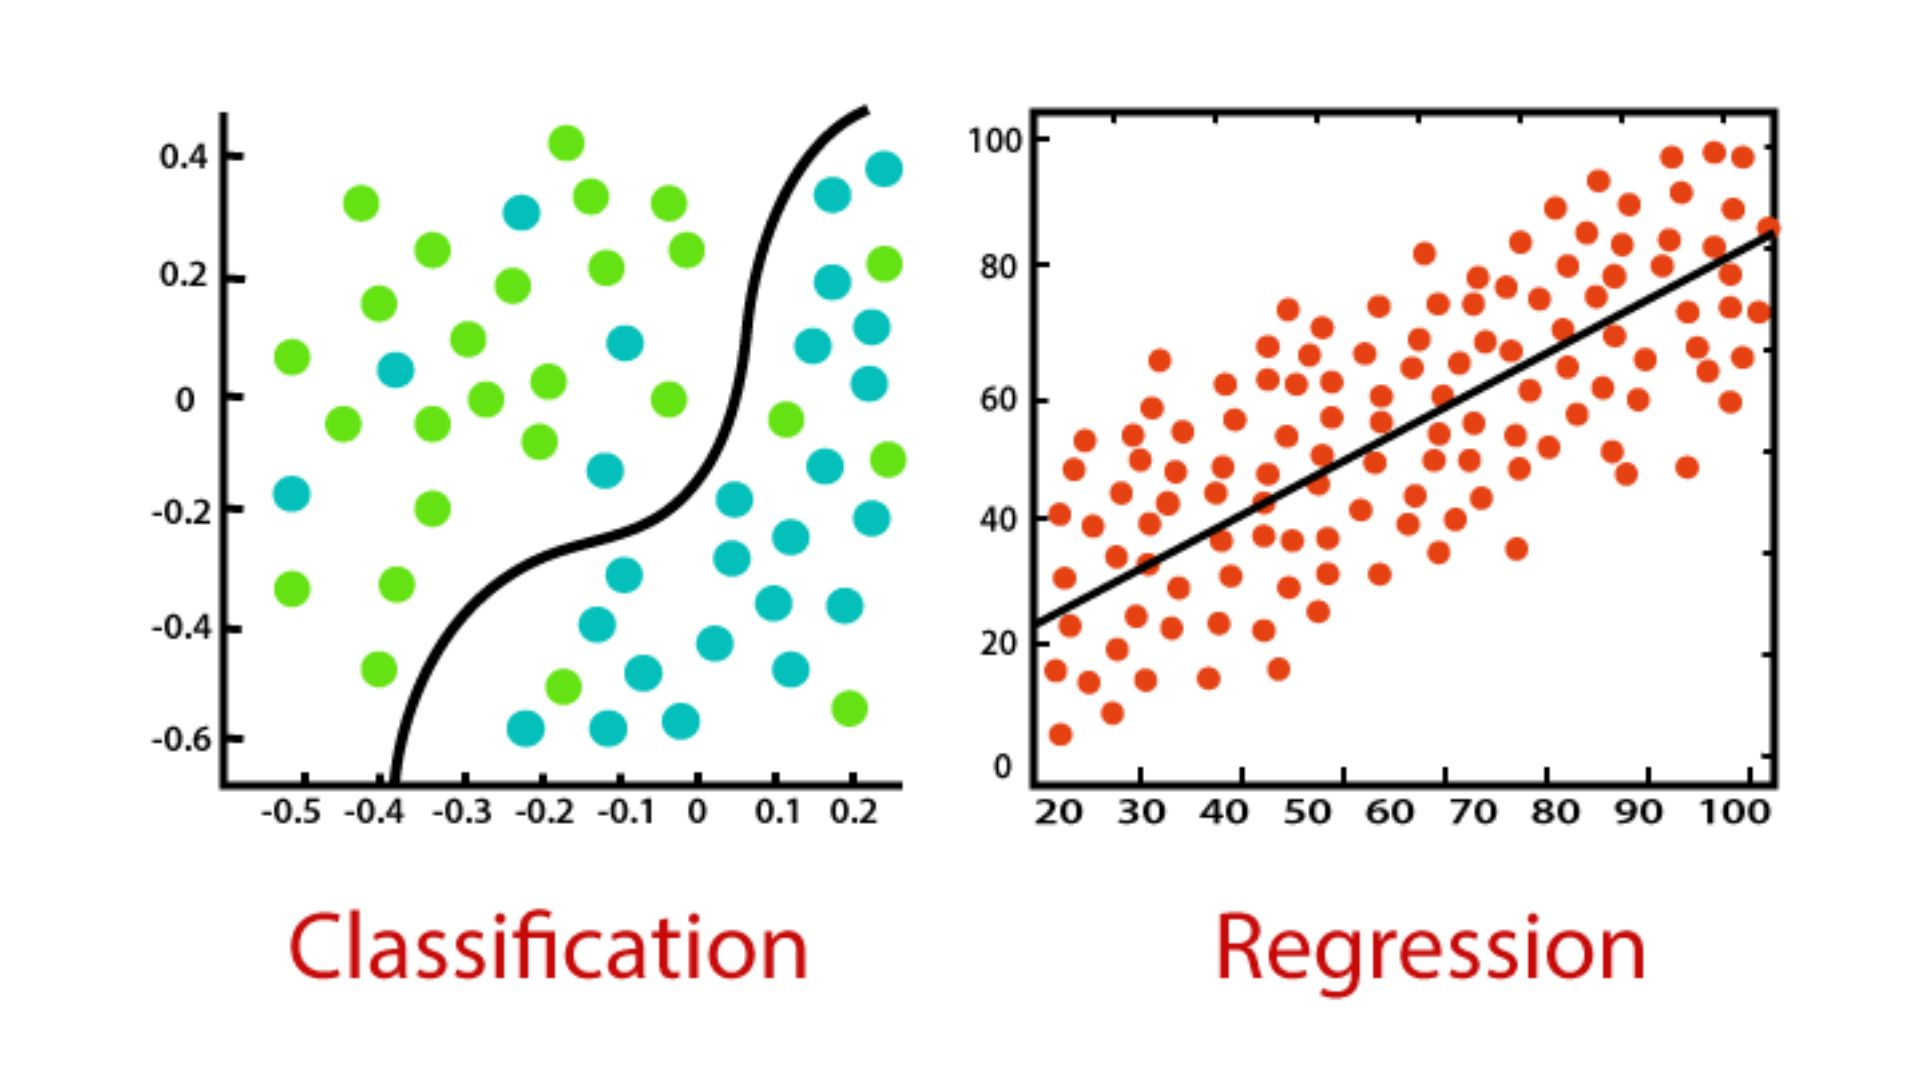

# Unsupervised learning

---


### It is used when you do not have labeled data. The model learns to find patterns in the data without being explicitly told what to look for.


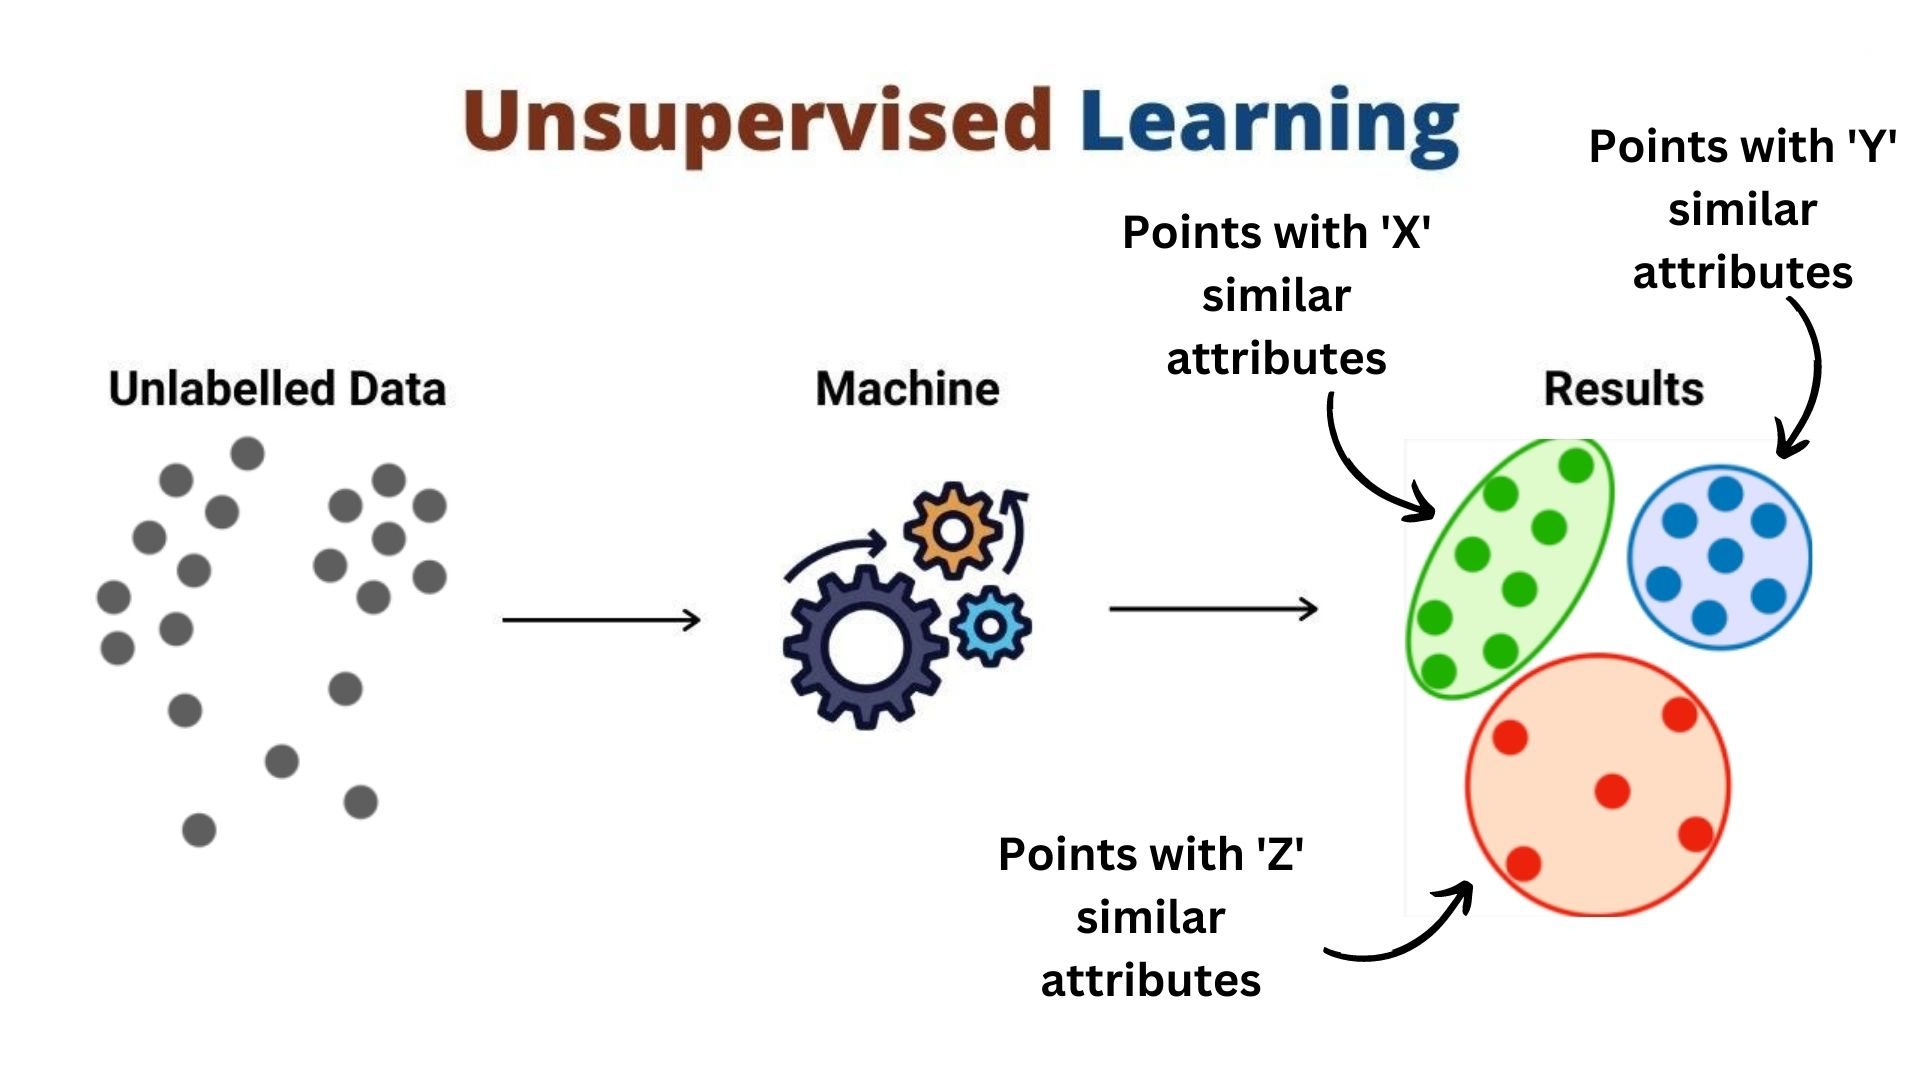

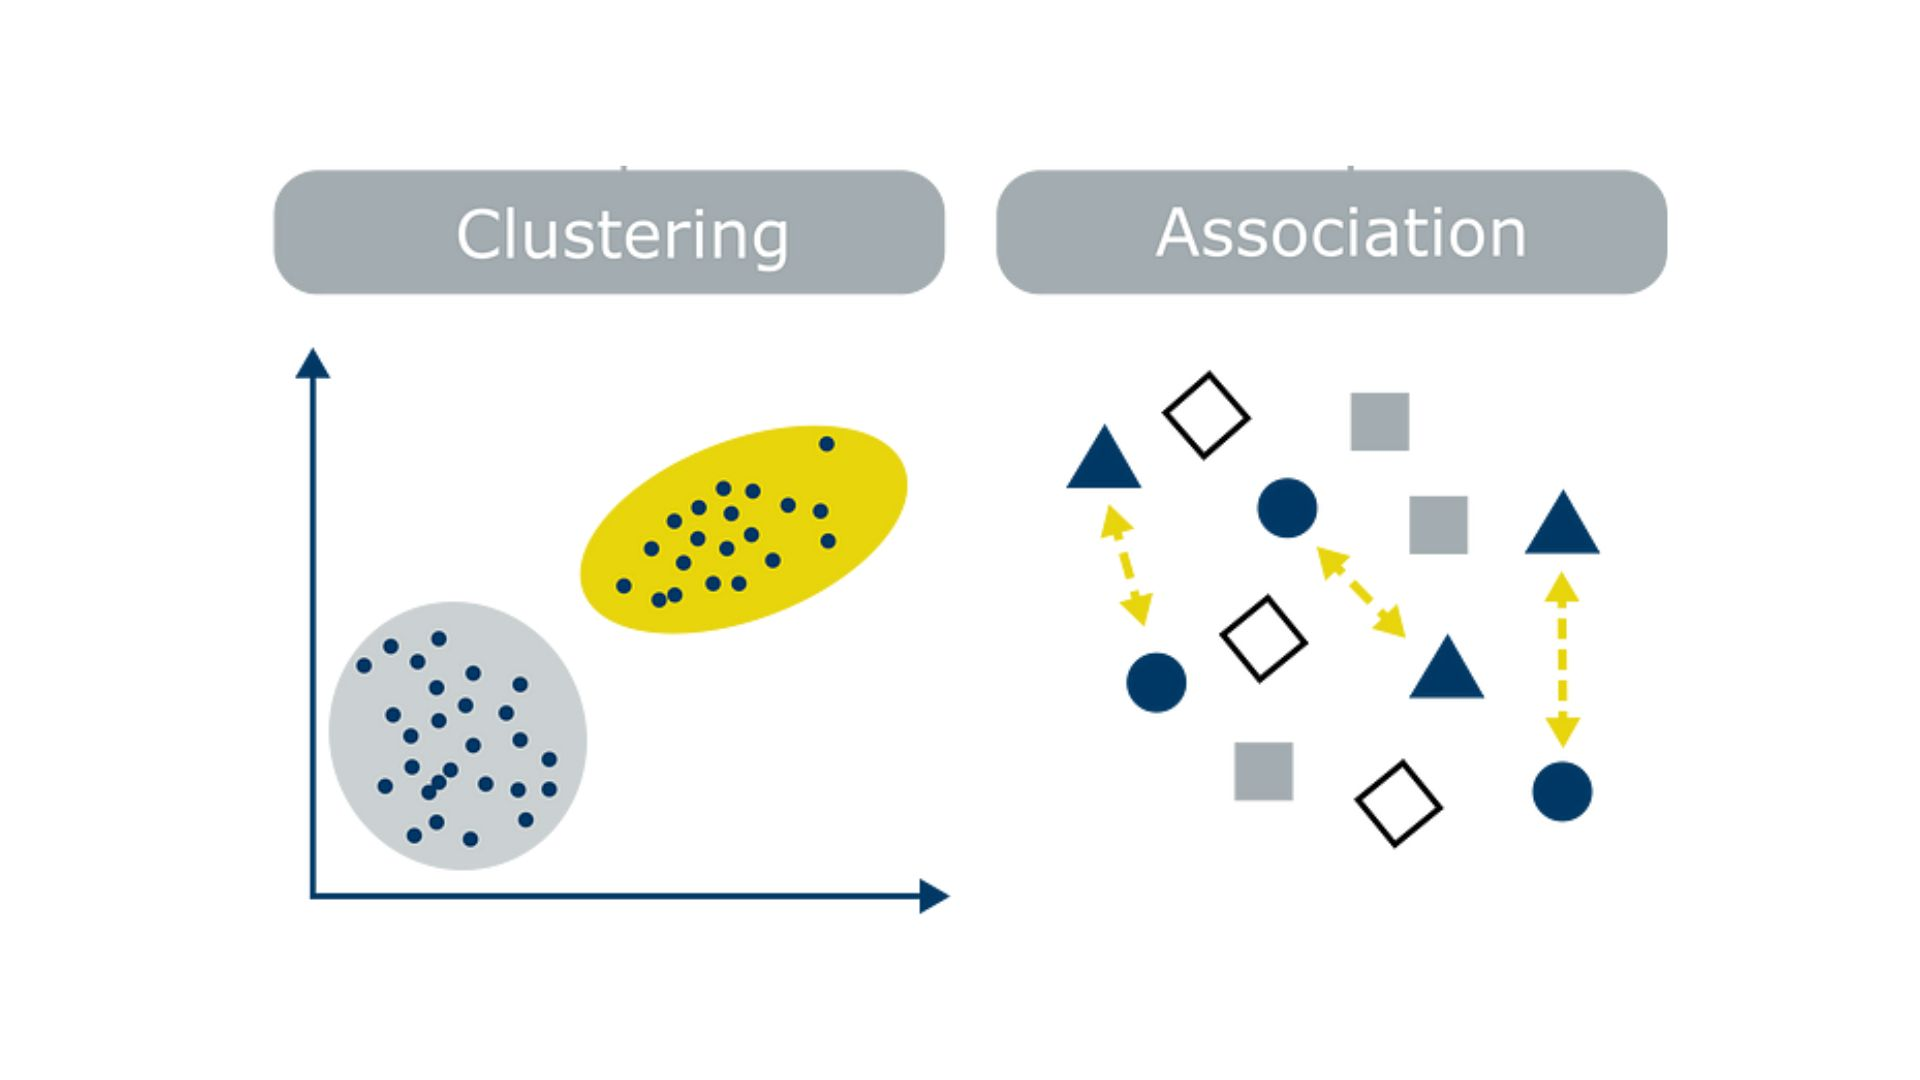

# Supervised Classification vs Unsupervised Clustering

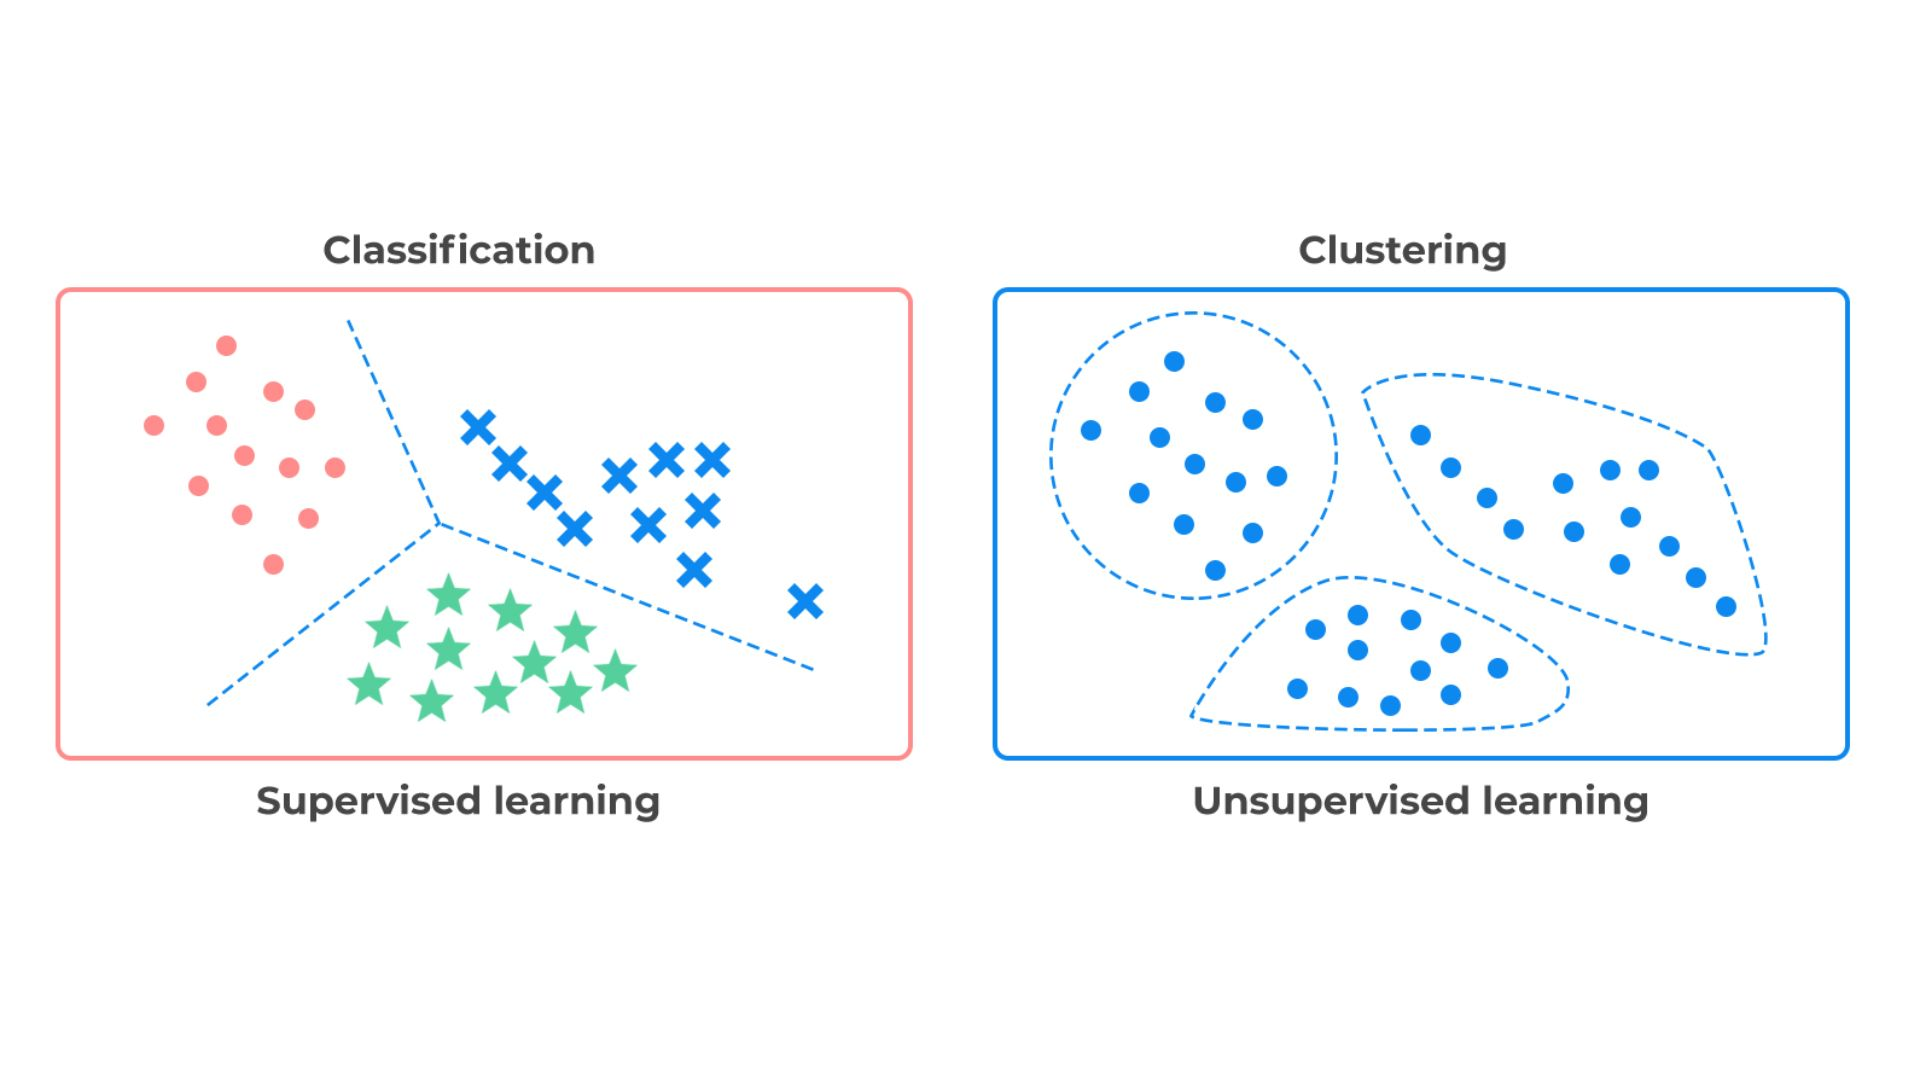






# Reinforcement learning

---


### It is a type of machine learning in which the agent learns by trial and error. The agent is given a reward for taking actions that lead to desired outcomes, and a penalty for taking actions that lead to undesired outcomes. The agent learns to take actions that maximize its rewards. For example.....


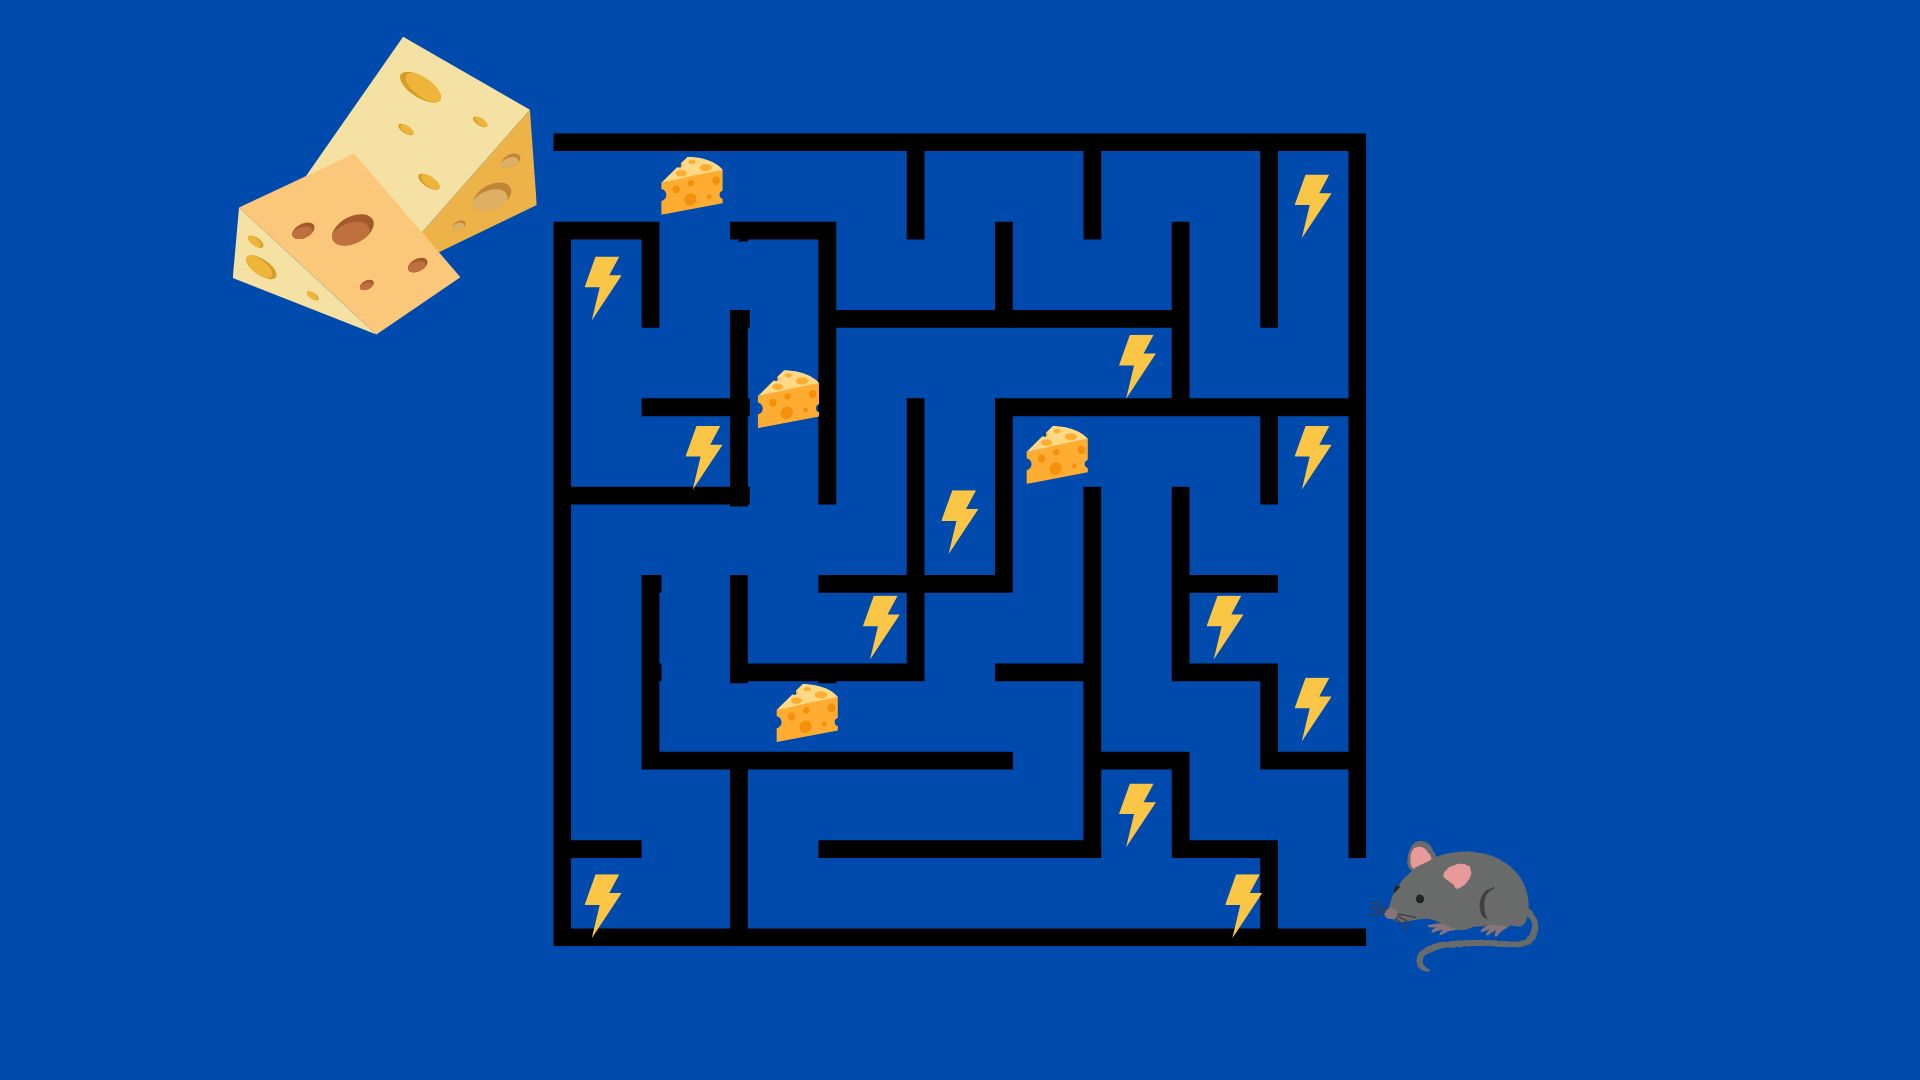

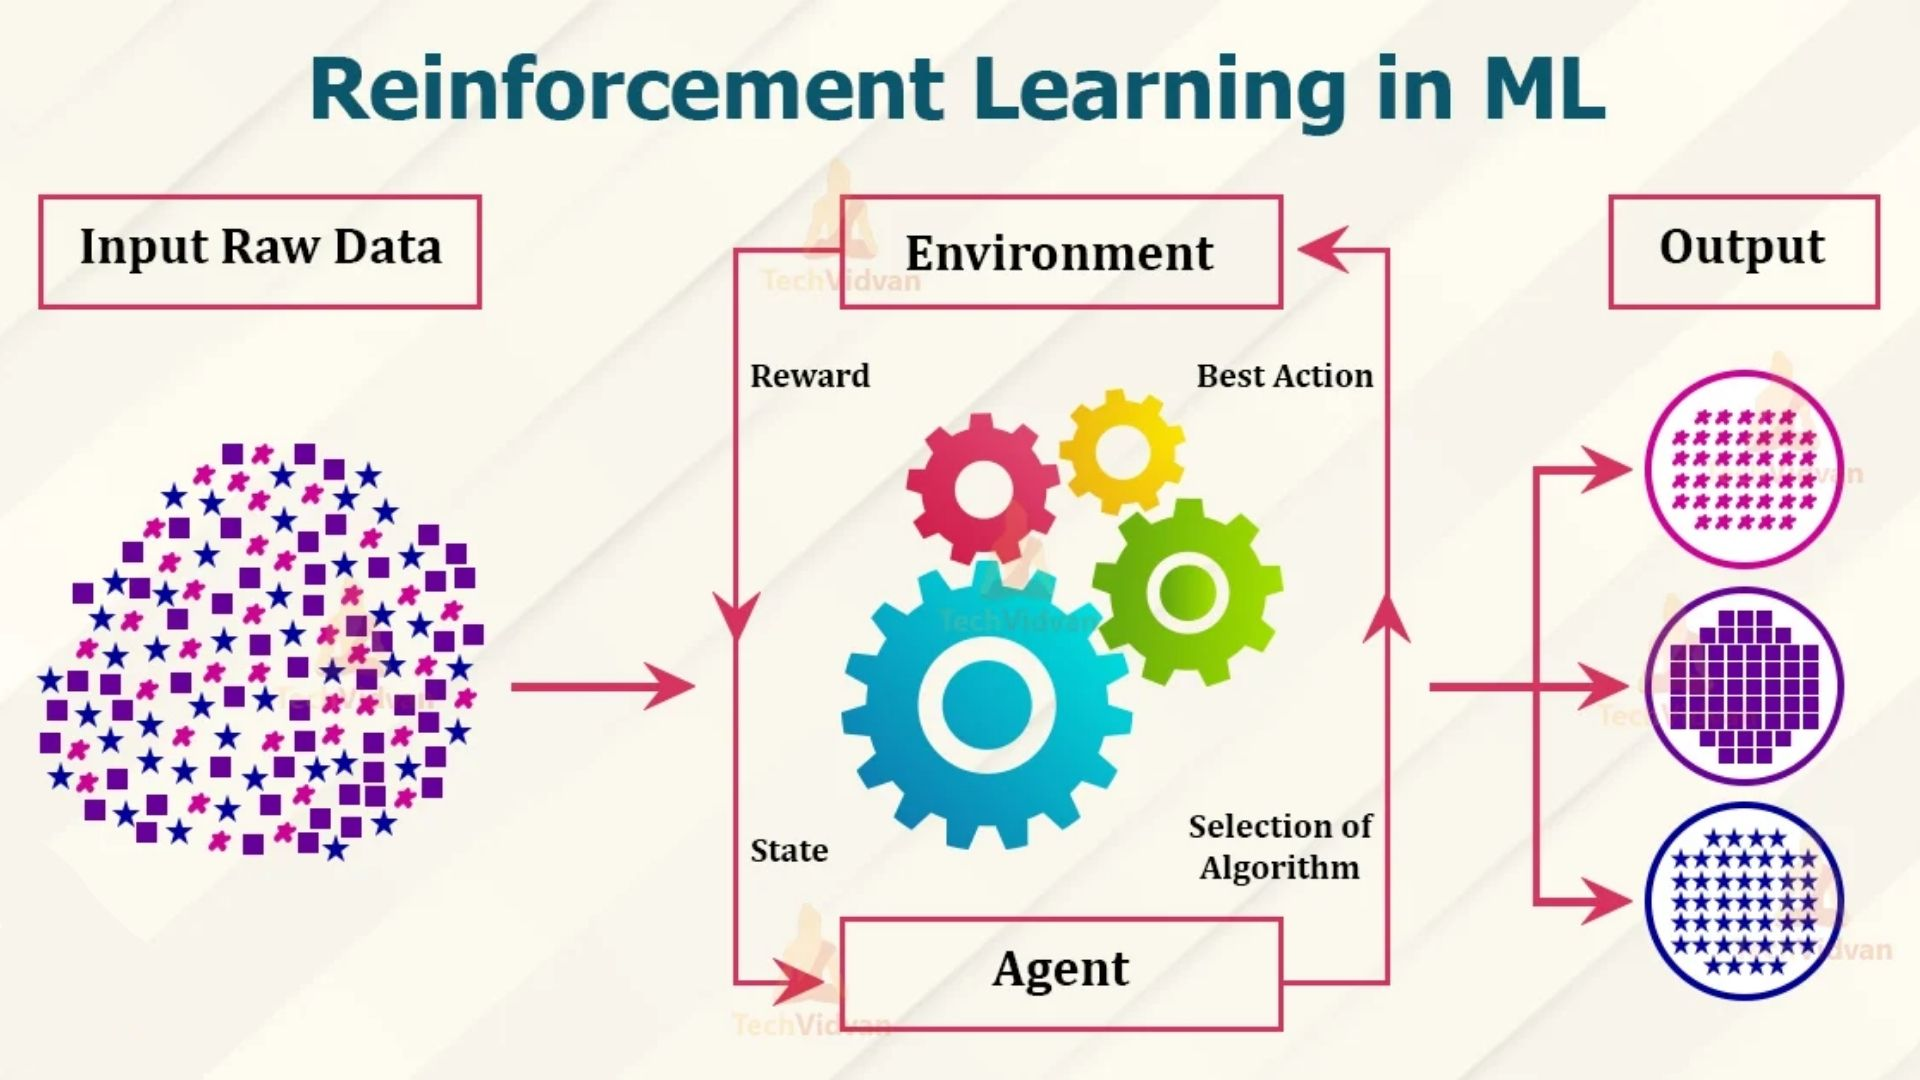

# Machine Learning Model Goal:
#### We now aim to create a machine learning model that has the ability to tell if a Flight will be delayed or not just by seeing the flight information like route, airlines and designated Timings etc.
#### The main motive of this model is to predict with a reasonable certainity if a flight will be delayed or not so that if someone wishes to book a connecting flight, they don't actually end up missing the connecting flight or if they have meetings planned later, they can schedule things accordingly.
#### Since this is an imbalanced dataset, we will use Ensemble Learning methods (Reinforcement Learning) mainly, we can also try DecisionTree for good measure.

# Machine Learning Models Trained on the Entire Dataset

In [ ]:
X=df.iloc[:,1:-1]
X.drop(['FlightDate','DelayGroup','DepTime','DepDelayMinutes','ArrTime','ArrDelayMinutes','TaxiIn','TaxiOut','Cancelled','Diverted','Flight_Number_Marketing_Airline','OriginAirportID','DestAirportID'],axis=1,inplace=True)
y=df.iloc[:,-1:]

KeyError: ignored

In [ ]:
X

Airline  Origin  Dest  CRSDepTime  OriginCityName  OriginStateName  \
0             7     144    98        1133             129                5   
1            15      96   123        1600             361               48   
2             0     265   368        1820              65               12   
3             0      72   264        1110              56               14   
4             0     265   332         851              65               12   
...         ...     ...   ...         ...             ...              ...   
456147       13     265    83        1937              65               12   
456148       13      96   123         750             361               48   
456150       13     265    46        1530              65               12   
456151       13     265   106        1010              65               12   
456152       13     175   244        1940             155               43   

        DestCityName  DestStateName  CRSArrTime  Year  Month  
0                 89              5        1245  2022      4  
1                243             29        1744  2022      4  
2                348             21        2034  2022      4  
3                 65             12        1234  2022      4  
4                333             24        1039  2022      4  
...              ...            ...         ...   ...    ...  
456147            74             24        2109  2019      1  
456148           243             29         909  2019     10  
456150           238             42        1712  2019      4  
456151            90             14        1138  2019      1  
456152           228              0        2100  2019      1  

[442744 rows x 11 columns]

In [ ]:
y

DelayOk
0             1
1             1
2             1
3             1
4             1
...         ...
456147        1
456148        1
456150        1
456151        0
456152        1

[442744 rows x 1 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pd.Series(y_pred).value_counts()

1    75391
0    13158
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     14727
           1       0.97      0.99      0.98     73822

    accuracy                           0.97     88549
   macro avg       0.96      0.92      0.94     88549
weighted avg       0.97      0.97      0.97     88549



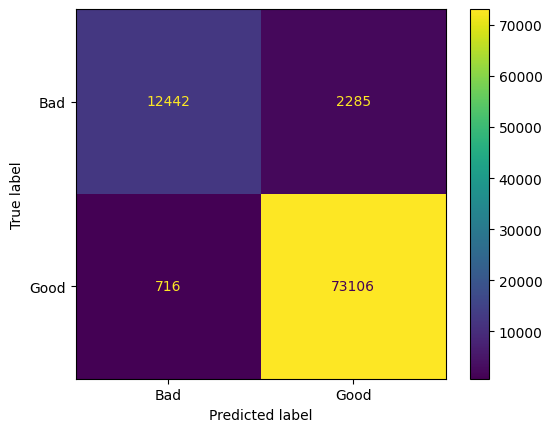

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

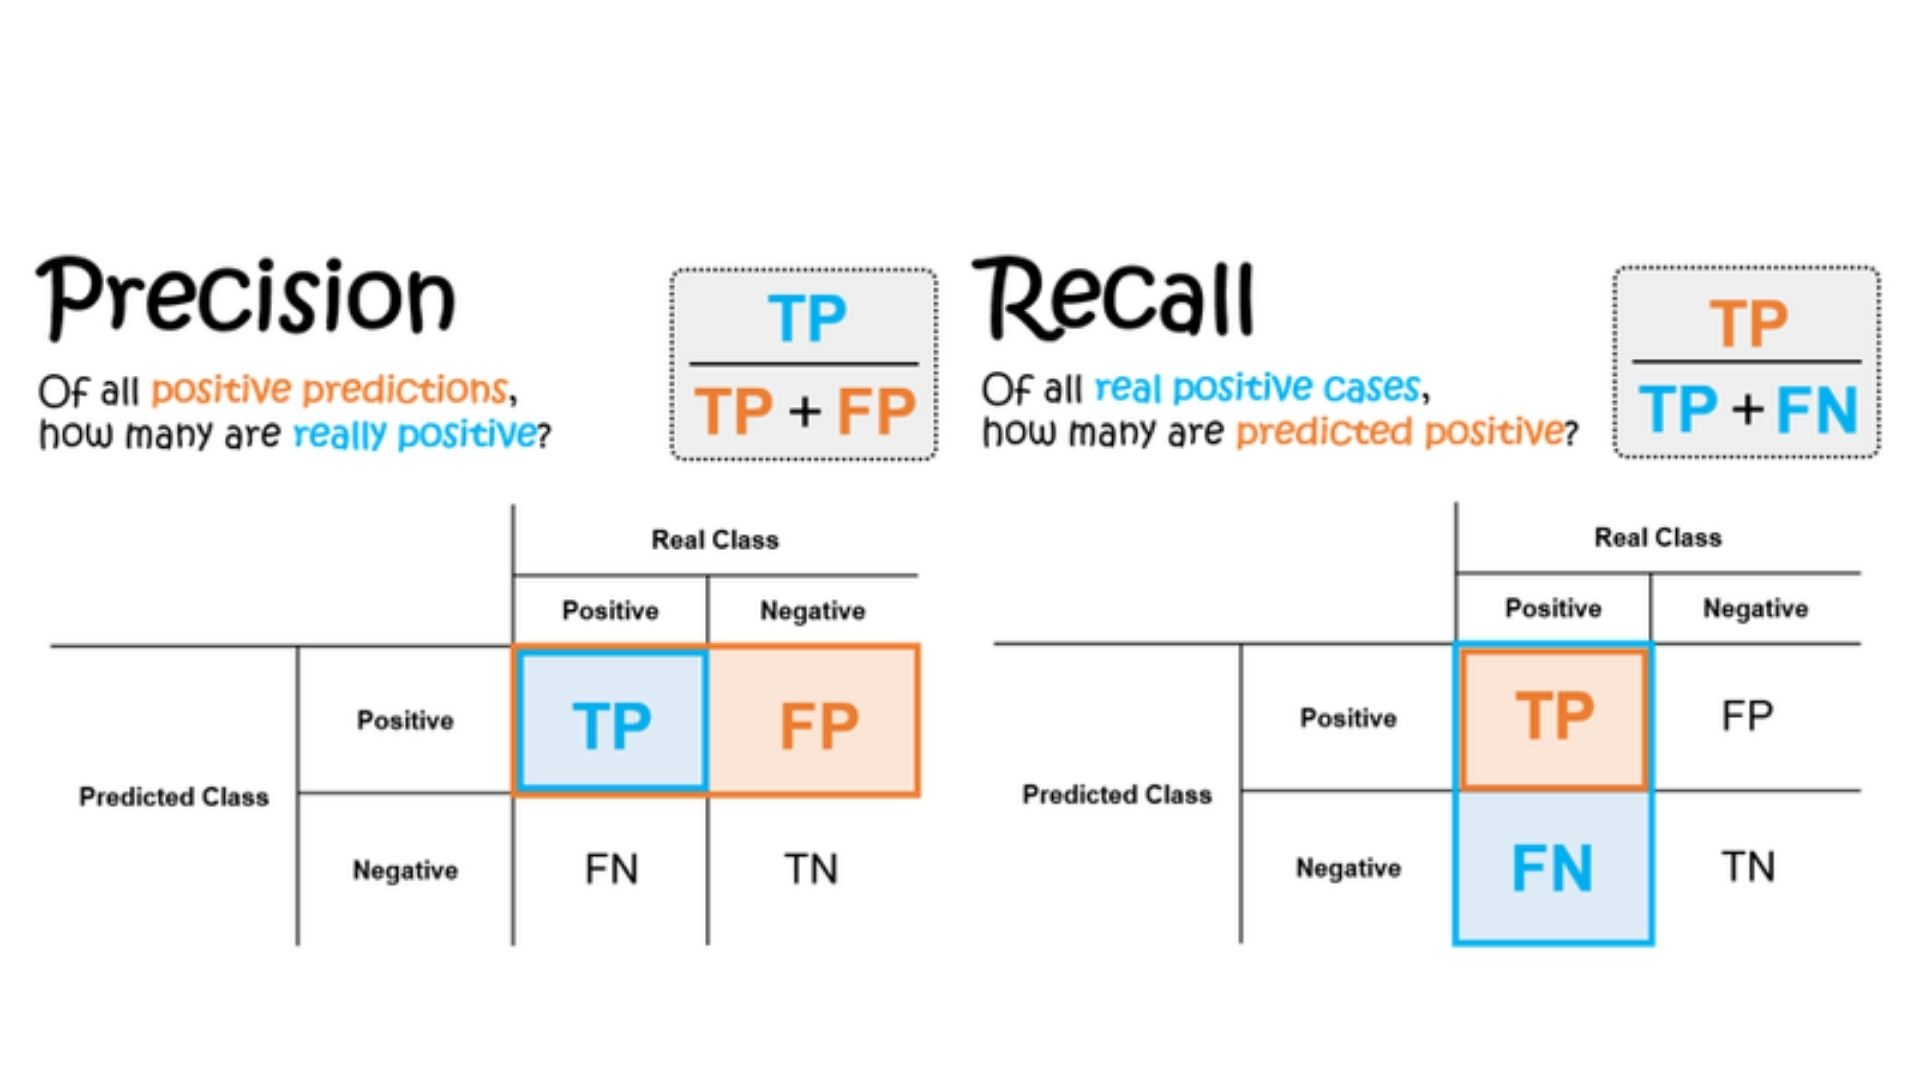

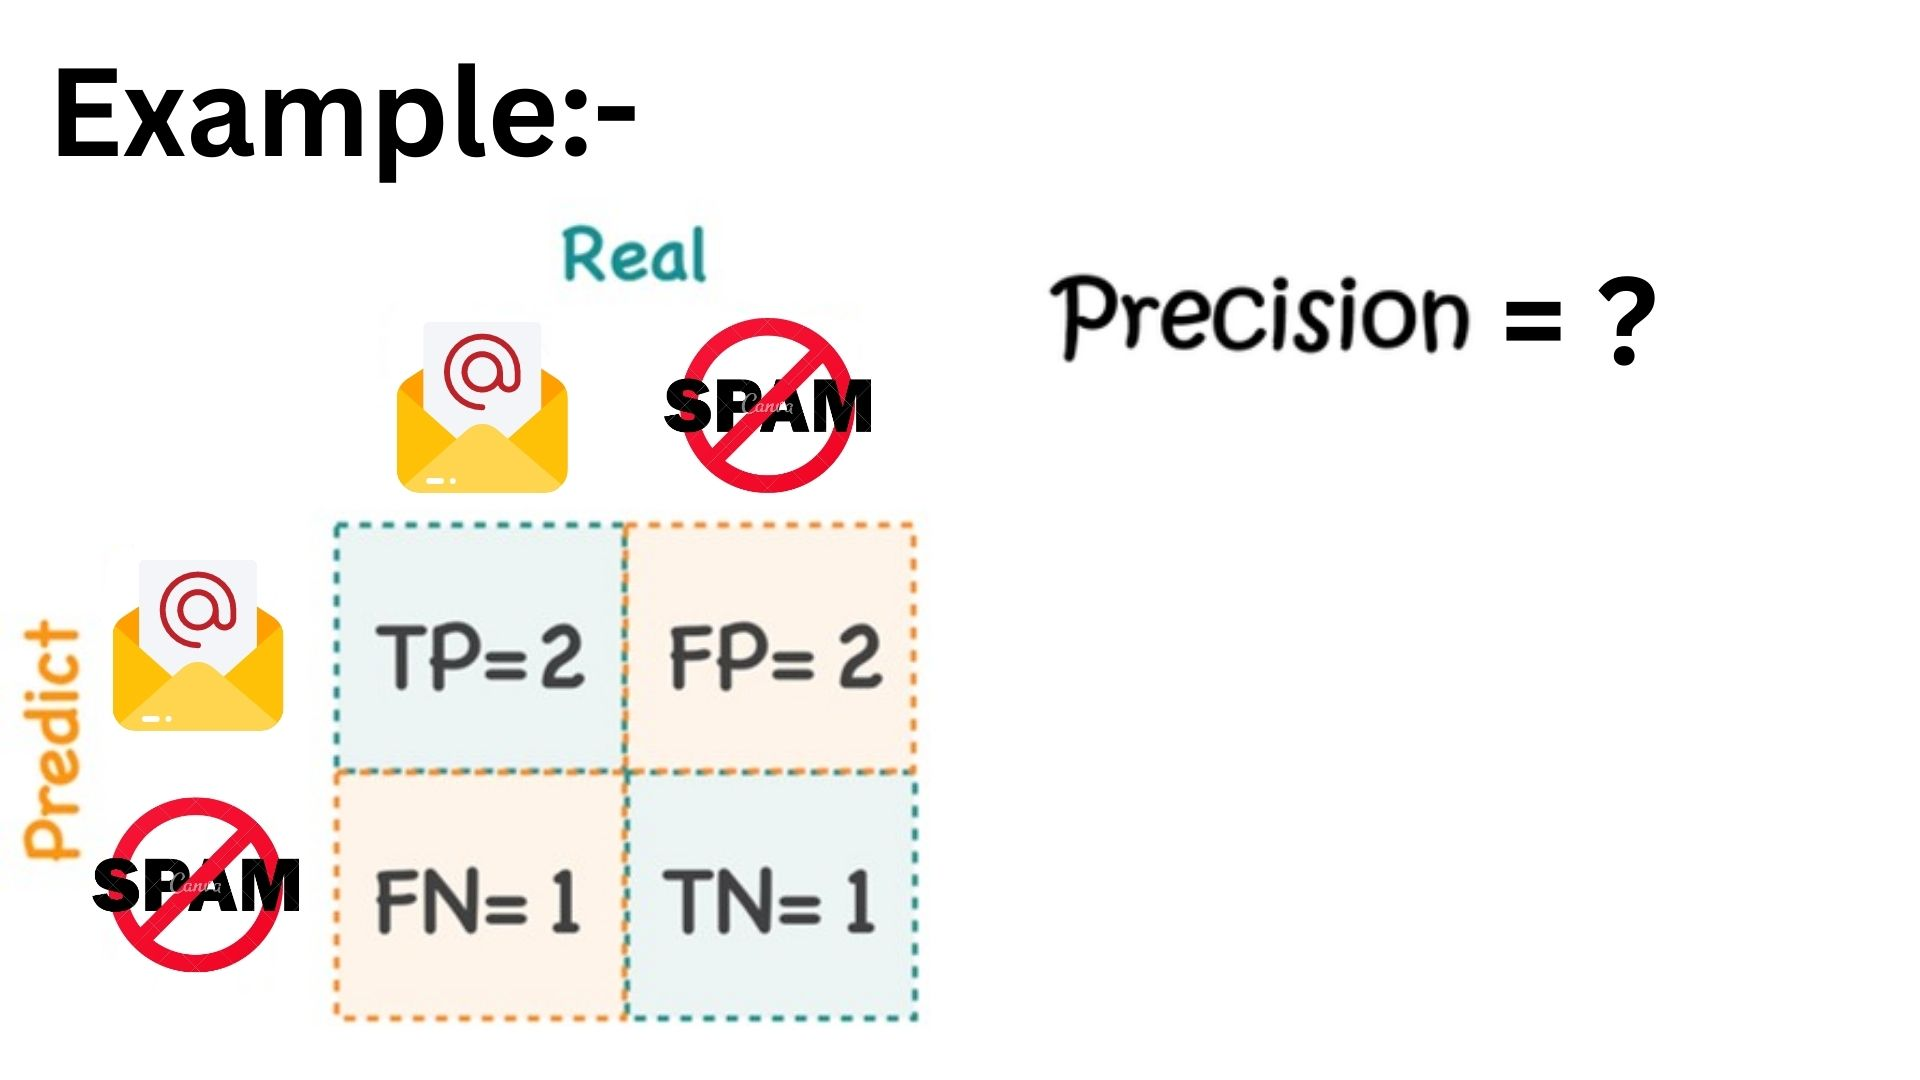

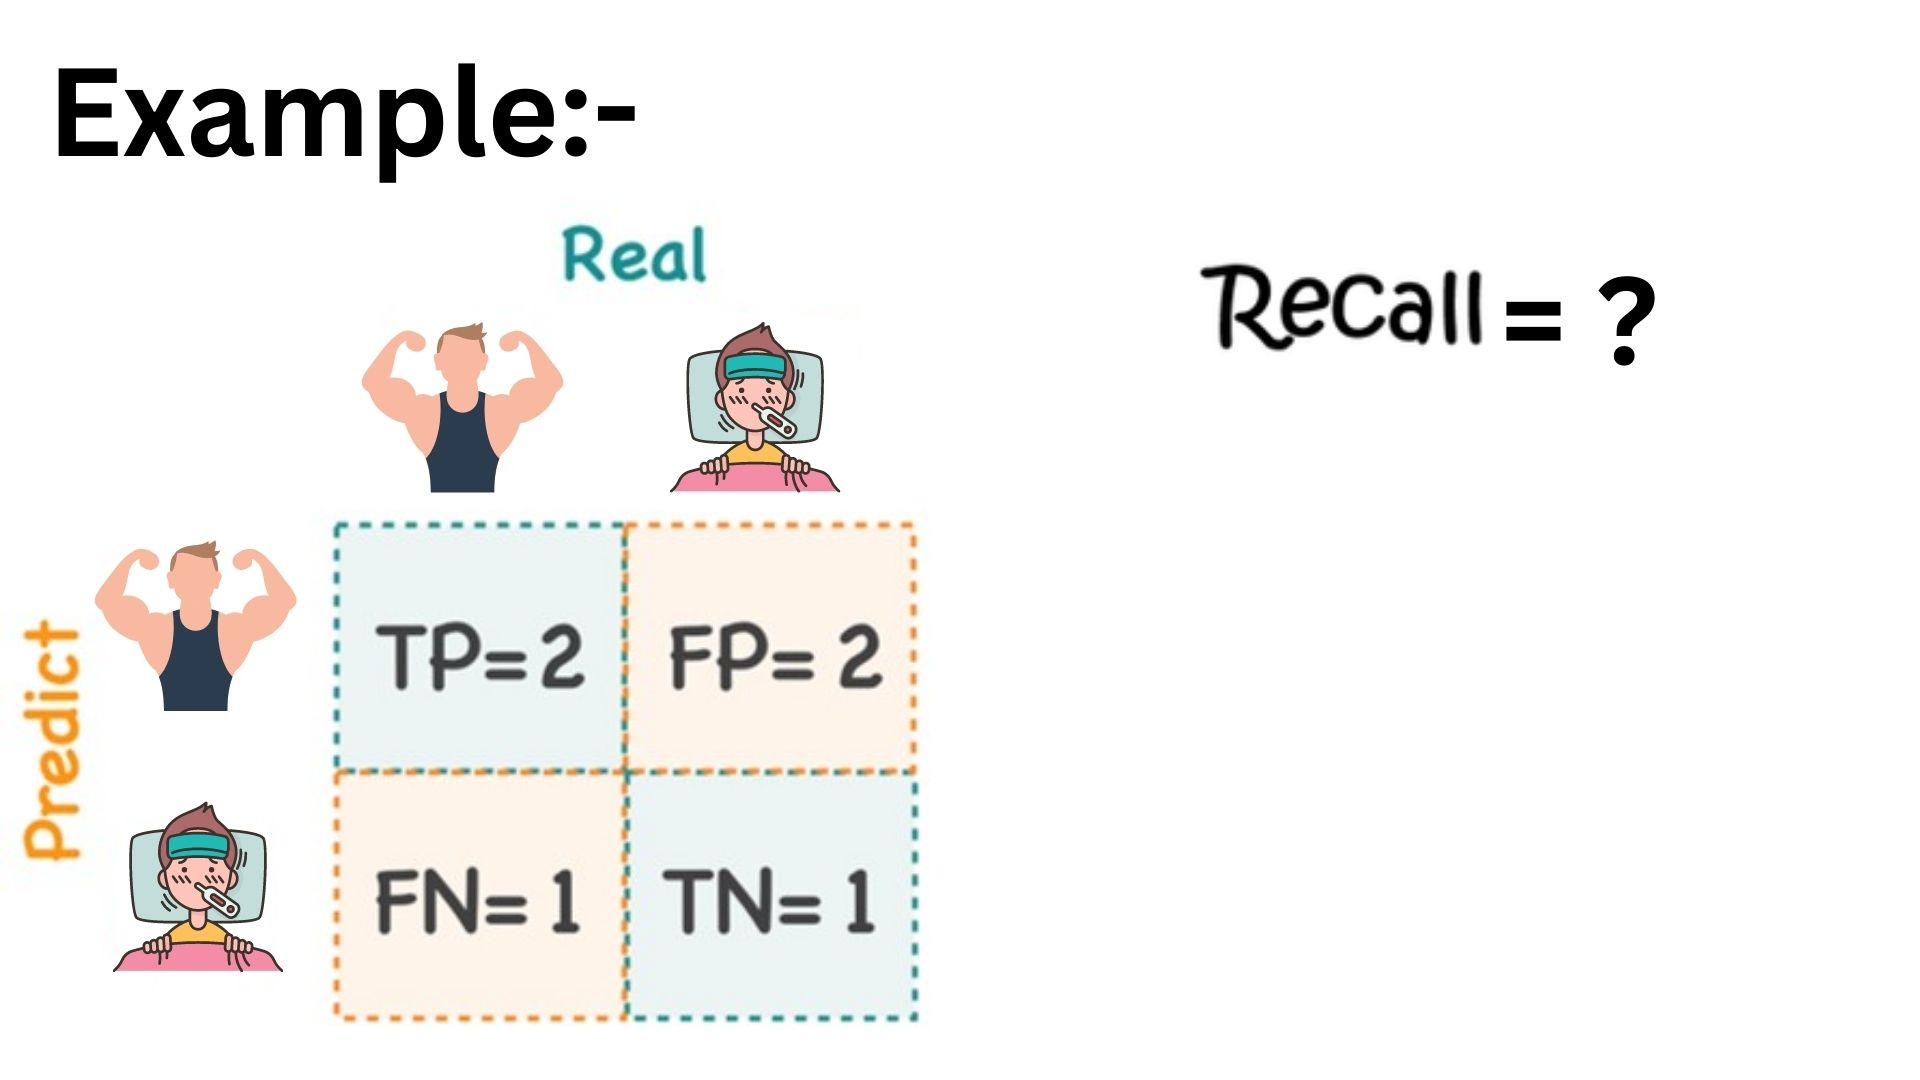

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     58853
           1       0.97      0.99      0.98    295342

    accuracy                           0.97    354195
   macro avg       0.96      0.92      0.94    354195
weighted avg       0.97      0.97      0.97    354195



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    73822
0    14727
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14727
           1       1.00      1.00      1.00     73822

    accuracy                           1.00     88549
   macro avg       1.00      1.00      1.00     88549
weighted avg       1.00      1.00      1.00     88549



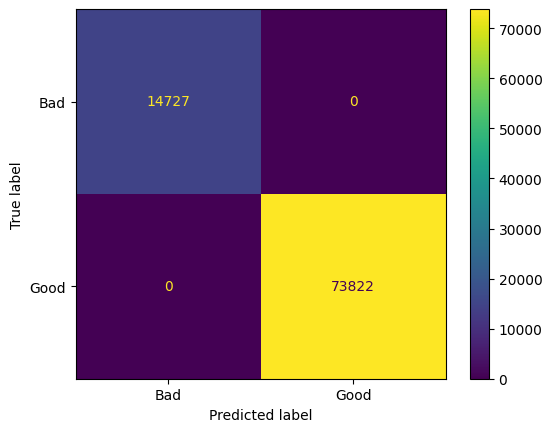

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58853
           1       1.00      1.00      1.00    295342

    accuracy                           1.00    354195
   macro avg       1.00      1.00      1.00    354195
weighted avg       1.00      1.00      1.00    354195



## XGBoost

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    73822
0    14727
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14727
           1       1.00      1.00      1.00     73822

    accuracy                           1.00     88549
   macro avg       1.00      1.00      1.00     88549
weighted avg       1.00      1.00      1.00     88549



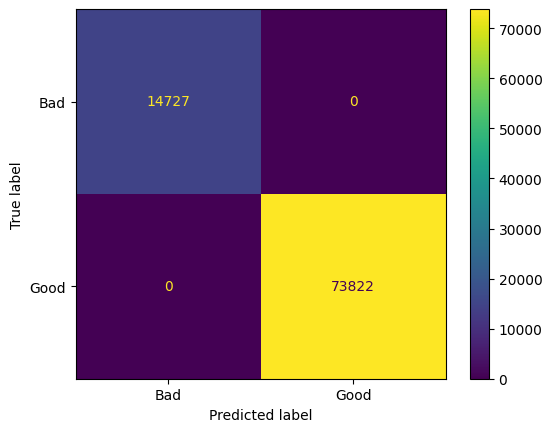

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58853
           1       1.00      1.00      1.00    295342

    accuracy                           1.00    354195
   macro avg       1.00      1.00      1.00    354195
weighted avg       1.00      1.00      1.00    354195



### This is the Model Performance on the entire dataset but during the EDA phase we noticed that 2020 had the most number of delays and cancellations all due to the COVID-19 pandemic so using it for training a flight delay prediction model may not result in Accurate predictions.

# Machine Learning Models trained on data excluding the year 2020

In [ ]:
new_df=df[df['Year']!=2020]

In [ ]:
len(new_df)

369103

In [ ]:
X=new_df.iloc[:,1:-1]
X.drop(['FlightDate','DelayGroup','DepTime','DepDelayMinutes','ArrTime','ArrDelayMinutes','TaxiIn','TaxiOut','Cancelled','Diverted','Flight_Number_Marketing_Airline','OriginAirportID','DestAirportID'],axis=1,inplace=True)
y=new_df.iloc[:,-1:]

KeyError: ignored

In [ ]:
df_top

FlightDate                 Airline  Flight_Number_Marketing_Airline  \
0      2022-01-04  Southwest Airlines Co.                             1057   
1      2022-01-04  Southwest Airlines Co.                             1024   
2      2022-01-04  Southwest Airlines Co.                             1113   
3      2022-01-04  Southwest Airlines Co.                              269   
4      2022-01-04  Southwest Airlines Co.                             1629   
...           ...                     ...                              ...   
395739 2019-01-30      Mesa Airlines Inc.                             6285   
395740 2019-01-01      Mesa Airlines Inc.                             6334   
395741 2019-01-27      Mesa Airlines Inc.                             6242   
395742 2019-08-01      Mesa Airlines Inc.                             6260   
395743 2019-01-14      Mesa Airlines Inc.                             6334   

       Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  \
0         ATL  AUS      False     False        1440   1505.0             25.0   
1         ATL  OMA      False     False        1250   1303.0             13.0   
2         AUS  HOU      False     False         640    701.0             21.0   
3         BDL  DEN      False     False         730    726.0              0.0   
4         BNA  LAS      False     False        1455   1458.0              3.0   
...       ...  ...        ...       ...         ...      ...              ...   
395739    IAD  CLE      False     False        2200   2240.0             40.0   
395740    IAD  LGA      False     False        1705   1702.0              0.0   
395741    DAY  IAH      False     False         630    630.0              0.0   
395742    LGA  IAD      False     False        1020   1012.0              0.0   
395743    IAD  LGA      False     False        1710   1737.0             27.0   

        ...  DestStateName TaxiOut TaxiIn  CRSArrTime ArrTime ArrDelayMinutes  \
0       ...          Texas    11.0    7.0        1615  1632.0            17.0   
1       ...       Nebraska    13.0    4.0        1415  1415.0             0.0   
2       ...          Texas     8.0    3.0         735   744.0             9.0   
3       ...       Colorado    15.0    4.0        1000   934.0             0.0   
4       ...         Nevada    13.0    5.0        1705  1651.0             0.0   
...     ...            ...     ...    ...         ...     ...             ...   
395739  ...           Ohio    32.0    9.0        2322    17.0            55.0   
395740  ...       New York    21.0    7.0        1848  1809.0             0.0   
395741  ...          Texas    42.0    7.0         830   838.0             8.0   
395742  ...       Virginia    31.0    5.0        1149  1136.0             0.0   
395743  ...       New York    23.0    7.0        1844  1848.0             4.0   

          DelayGroup  Year  Month  DelayOk  
0       Medium_Delay  2022      1      Bad  
1        Small_Delay  2022      1     Good  
2       Medium_Delay  2022      1      Bad  
3       OnTime_Early  2022      1     Good  
4        Small_Delay  2022      1     Good  
...              ...   ...    ...      ...  
395739  Medium_Delay  2019      1      Bad  
395740  OnTime_Early  2019      1     Good  
395741  OnTime_Early  2019      1     Good  
395742  OnTime_Early  2019      8     Good  
395743  Medium_Delay  2019      1      Bad  

[395744 rows x 25 columns]

In [ ]:
X

Airline  Flight_Number_Marketing_Airline  Origin  Dest  Cancelled  \
0             7                             4301     144    98          0   
1            15                             4183      96   123          0   
2             0                             3908     265   368          0   
3             0                             3812      72   264          0   
4             0                             3744     265   332          0   
...         ...                              ...     ...   ...        ...   
456147       13                             4238     265    83          0   
456148       13                             4241      96   123          0   
456150       13                             4245     265    46          0   
456151       13                             4247     265   106          0   
456152       13                             4250     175   244          0   

        Diverted  CRSDepTime  DepTime  DepDelayMinutes  OriginAirportID  ...  \
0              0        1133   1123.0              0.0            11921  ...   
1              0        1600   1600.0              0.0            11278  ...   
2              0        1820   1810.0              0.0            13930  ...   
3              0        1110   1103.0              0.0            11003  ...   
4              0         851    856.0              5.0            13930  ...   
...          ...         ...      ...              ...              ...  ...   
456147         0        1937   1931.0              0.0            13930  ...   
456148         0         750    743.0              0.0            11278  ...   
456150         0        1530   1527.0              0.0            13930  ...   
456151         0        1010   1059.0             49.0            13930  ...   
456152         0        1940   1939.0              0.0            12266  ...   

        DestCityName  DestStateName  TaxiOut  TaxiIn  CRSArrTime  ArrTime  \
0                 89              5     17.0     8.0        1245   1228.0   
1                243             29     18.0     7.0        1744   1702.0   
2                348             21     13.0     3.0        2034   2012.0   
3                 65             12      9.0    10.0        1234   1204.0   
4                333             24     21.0     6.0        1039   1038.0   
...              ...            ...      ...     ...         ...      ...   
456147            74             24     20.0     4.0        2109   2052.0   
456148           243             29     15.0     8.0         909    852.0   
456150           238             42     16.0    18.0        1712   1701.0   
456151            90             14     18.0     4.0        1138   1218.0   
456152           228              0     17.0     4.0        2100   2058.0   

        ArrDelayMinutes  DelayGroup  Year  Month  
0                   0.0           3  2022      4  
1                   0.0           3  2022      4  
2                   0.0           3  2022      4  
3                   0.0           3  2022      4  
4                   0.0           4  2022      4  
...                 ...         ...   ...    ...  
456147              0.0           3  2019      1  
456148              0.0           3  2019     10  
456150              0.0           3  2019      4  
456151             40.0           1  2019      1  
456152              0.0           3  2019      1  

[369103 rows x 23 columns]

In [ ]:
y

DelayOk
0             1
1             1
2             1
3             1
4             1
...         ...
456147        1
456148        1
456150        1
456151        0
456152        1

[442744 rows x 1 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

ValueError: ignored

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14727
           1       1.00      1.00      1.00     73822

    accuracy                           1.00     88549
   macro avg       1.00      1.00      1.00     88549
weighted avg       1.00      1.00      1.00     88549



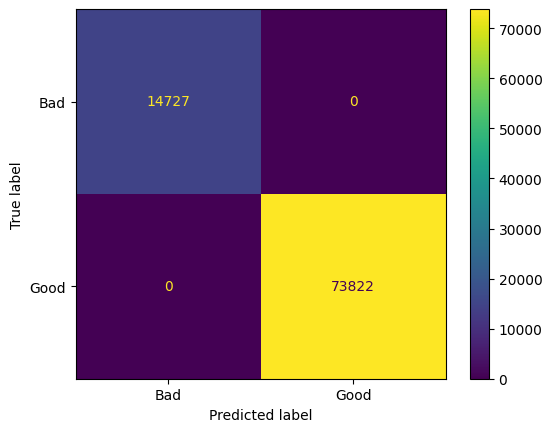

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58853
           1       1.00      1.00      1.00    295342

    accuracy                           1.00    354195
   macro avg       1.00      1.00      1.00    354195
weighted avg       1.00      1.00      1.00    354195



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    73822
0    14727
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14727
           1       1.00      1.00      1.00     73822

    accuracy                           1.00     88549
   macro avg       1.00      1.00      1.00     88549
weighted avg       1.00      1.00      1.00     88549



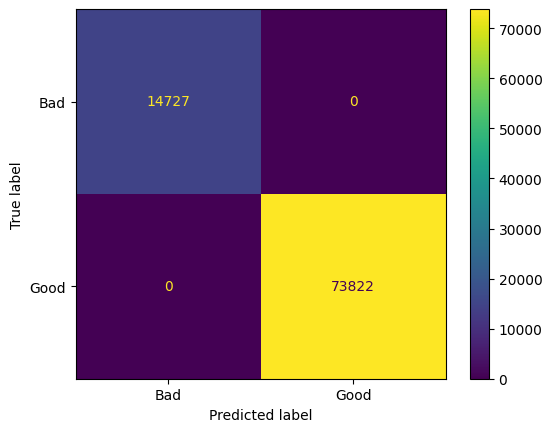

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58853
           1       1.00      1.00      1.00    295342

    accuracy                           1.00    354195
   macro avg       1.00      1.00      1.00    354195
weighted avg       1.00      1.00      1.00    354195



## XGBoost

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

1    73822
0    14727
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14727
           1       1.00      1.00      1.00     73822

    accuracy                           1.00     88549
   macro avg       1.00      1.00      1.00     88549
weighted avg       1.00      1.00      1.00     88549



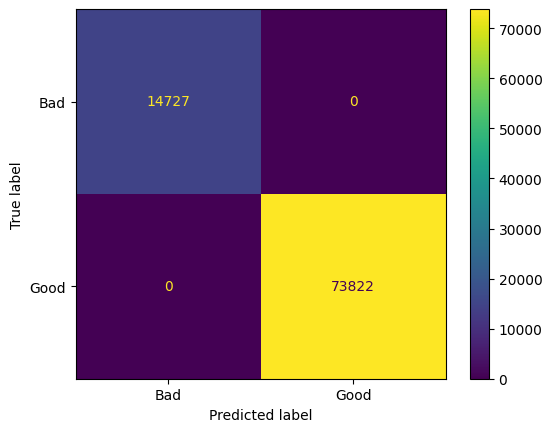

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bad', 'Good'])

cm_display.plot()
plt.show()

In [ ]:
y_pred2=classifier2.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58853
           1       1.00      1.00      1.00    295342

    accuracy                           1.00    354195
   macro avg       1.00      1.00      1.00    354195
weighted avg       1.00      1.00      1.00    354195



# Conclusion

### The accuracy of the models trained on the entire dataset may be marginally higher but we need to look deeper to really understand why models trained on the dataset excluding 2020 are actually far better.
### To begin with, take a look at the False Negatives and False Positives of XGBoost using the entire dataset vs using the dataset without the year 2020.
### Ideally a higher number of False Negatives won't harm us as if the model suggests that there would be a flight delay and in reality there isn't, the person won't miss the connecting flight or meeting.
### We need as low as possible number of False Positives as if the model says the flight will not be delayed but if in reality it gets delayed, the person may miss the connecting Flight.
### We hence see that the XGBoost model trained on the dataset without the year 2020, seems to have the best balance of False Negatives and False positives while still maintaining a decent accuracy of 82%. So we choose this model as our final model.

# Model Deployment

In [ ]:
X.columns

Index(['Airline', 'Flight_Number_Marketing_Airline', 'Origin', 'Dest',
       'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes',
       'OriginAirportID', 'OriginCityName', 'OriginStateName', 'DestAirportID',
       'DestCityName', 'DestStateName', 'TaxiOut', 'TaxiIn', 'CRSArrTime',
       'ArrTime', 'ArrDelayMinutes', 'DelayGroup', 'Year', 'Month'],
      dtype='object')

In [ ]:
classifier2.predict(np.array([[7,144,98,1133,129,5,89,5,1245,2022,4]]))[0]

In [ ]:
import pandas as pd

link = f'https://drive.google.com/uc?id=1StfOm_hCyVhyrvRhUCH5npVDY63hg766'
df2 = pd.read_csv(link)

In [ ]:
airline_list=list(df2['Airline'].unique())
origin_list=list(df2['Origin'].unique())
dest_list=list(df2['Dest'].unique())
origin_city_list=list(df2['OriginCityName'].unique())
origin_state_list=list(df2['OriginStateName'].unique())
dest_city_list=list(df2['DestCityName'].unique())
dest_state_list=list(df2['DestStateName'].unique())
month_list=list(np.arange(1,13))
year_list=list(np.arange(2018, 2026))

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import re
import re

def time(input_str):
    # Remove non-numeric characters except for "am"
    cleaned_str = re.sub(r'[^0-9aApPmM]', '', input_str)

    # Handle "am" or "pm" if present
    if cleaned_str.lower().endswith('am') or cleaned_str.lower().endswith('pm'):
        cleaned_str = cleaned_str[:-2]

    return int(cleaned_str)
def predictor(airline,origin,dest,dept_time,origin_city,origin_state,dest_city,dest_state,arr_time,month,year):
    pred=classifier2.predict(np.array([[le1.transform([airline])[0],le2.transform([origin])[0],le3.transform([dest])[0],time(dept_time),le6.transform([origin_city])[0],le8.transform([origin_state])[0],le7.transform([dest_city])[0],le9.transform([dest_state])[0],time(arr_time),int(month),int(year)]]))
    if(pred[0]==1):
      result="Your flight will not be delayed or may have a small delay < 15 minutes max"
    else:
      result="Your flight may be delayed for a period longer than 15 minutes or may get cancelled"
    return result


input_list=[gr.Dropdown(airline_list, label="Airline"),
            gr.Dropdown(origin_list, label="Origin Airport Code"),
            gr.Dropdown(dest_list, label="Destination Airport Code"),
            gr.Textbox(label="Departure Time", placeholder="Please input time in 24 hour format"),
            gr.Dropdown(origin_city_list, label="Origin City Name"),
            gr.Dropdown(origin_state_list, label="Origin State Name"),
            gr.Dropdown(dest_city_list, label="Dest City Name"),
            gr.Dropdown(dest_state_list, label="Dest State Name"),
            gr.Textbox(label="Arrival Time", placeholder="Please input time in 24 hour format"),
            gr.Dropdown(month_list, label="Month"),
            gr.Dropdown(year_list, label="Year"),
            ]
app = gr.Interface(fn = predictor, title="Airline Delay Predictor", inputs=input_list, outputs="text")
app.queue().launch(share=True,debug=True)